<p style="text-align:center;"><span style="font-size:50px;"><span style="color:Black;"><span style="font-family:Georgia;"> Mobile price prediction ! </span> </span>  </span></p>

Dataset :
    - There are two datasets named train & test
    - In train dataset there are 2000 moblies and their features.
    - These samples have prices which we know them as target.
    - The target values are classified into 4 classes.
    - Also in test dataset there are some sample without price column which i'm going to predict their prices.

Models :
    - I want to train my data with 3 classification algorithms which are : 
    - Decision tree
    - Random forest
    - SVM (Support Vector Machine)

# Importing data & libraries

In [1]:
import numpy as np                    # import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings                          # for ignoring warnings
warnings.simplefilter (action = 'ignore')

In [2]:
from sklearn.model_selection import train_test_split    # for train & test
from sklearn import metrics                             # for metrics
from sklearn.preprocessing import StandardScaler        # for Scalling
from sklearn.model_selection import GridSearchCV        # for improving model
from sklearn.model_selection import KFold               # for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report , confusion_matrix  
from sklearn.tree import DecisionTreeClassifier         # for decision tree model
from sklearn.ensemble import RandomForestClassifier     # for Random Forest model
from sklearn.svm import SVC                             # for SVM model  
from sklearn import tree                                # for decision tree and plotting 

In [3]:
# import and transform the dataset to dataframe 
data = pd.read_csv ("train.csv")
df = pd.DataFrame (data)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Preprocessing

In [4]:
df.describe ().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


There are some strange values in px_height and sc_w columns

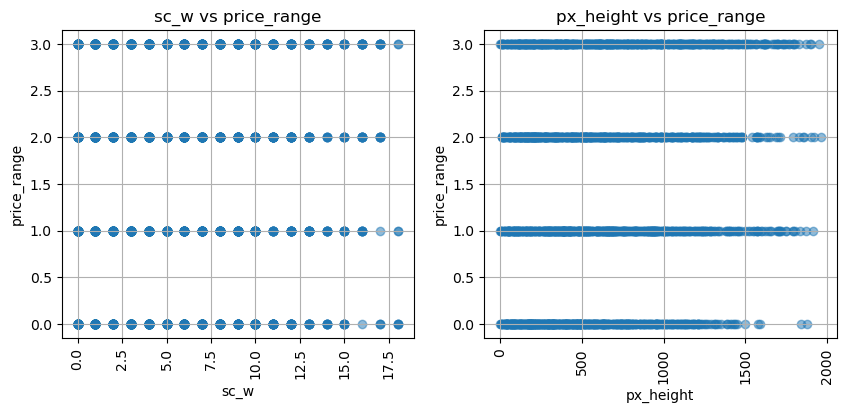

In [5]:
plt.figure (figsize = [10 , 4])
plt.subplot (1 , 2 , 1)   
plt.scatter (df ['sc_w'] , df ["price_range"] , alpha = .5)
plt.title ("sc_w vs price_range")
plt.xlabel ('sc_w')
plt.xticks (rotation = 90)
plt.ylabel ("price_range")
plt.grid ()

plt.subplot (1 , 2 , 2)
plt.scatter (df ['px_height'] , df ["price_range"] , alpha = .5)
plt.title ("px_height vs price_range")
plt.xlabel ("px_height")
plt.xticks (rotation = 90)
plt.ylabel ("price_range")
plt.grid ()
plt.show ()

Visualization for these columns show us many strange values 
    
The screen width and height are in centimeters
    
There isn't any mobile phone with 0 or even under 3 centimeter screen width or height
    
Also the columns related to pixels, have very strange and nonsense values

lets check thier rows and the number of them

In [6]:
df_check = df [df ['sc_w'] <= 1]
df_check

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,1
13,803,1,2.1,0,7,0,17,1.0,198,4,...,344,1440,2680,7,1,4,1,0,1,2
19,682,1,0.5,0,4,0,19,1.0,121,4,...,902,1064,2337,11,1,18,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,1976,1,2.6,1,6,0,45,1.0,136,4,...,652,1933,2470,11,1,3,0,0,0,3
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
1981,1454,0,2.6,0,8,0,6,0.4,199,3,...,698,1018,1300,10,0,2,0,0,1,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,2


In [7]:
df_check = df [ df ['px_height'] <= 500]
df_check

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,1
1989,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
df_corr = df [['px_height' , 'px_width' , 'sc_h' , 'sc_w' , 'price_range']]
df_corr.corr()

,px_height,px_width,sc_h,sc_w,price_range
px_height,1.000000,0.510664,0.059615,0.043038,0.148858
px_width,0.510664,1.000000,0.021599,0.034699,0.165818
sc_h,0.059615,0.021599,1.000000,0.506144,0.022986
sc_w,0.043038,0.034699,0.506144,1.000000,0.038711
price_range,0.148858,0.165818,0.022986,0.038711,1.000000


conclusion :
    - These values are not logical and they shouldn't be in our model
    - Their correlation with target are low
    - There are some relation between them and 2 other columns named px_width and sc_h (They are width and height of screens and resolution)
    - So if i want to remove px_height and sc_w => i should remove px_width and sc_h too
    - But i remove them for models and training, not visualization !

In [9]:
df.info ()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2000 entries, 0 to 1999

Data columns (total 21 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   battery_power  2000 non-null   int64  

 1   blue           2000 non-null   int64  

 2   clock_speed    2000 non-null   float64

 3   dual_sim       2000 non-null   int64  

 4   fc             2000 non-null   int64  

 5   four_g         2000 non-null   int64  

 6   int_memory     2000 non-null   int64  

 7   m_dep          2000 non-null   float64

 8   mobile_wt      2000 non-null   int64  

 9   n_cores        2000 non-null   int64  

 10  pc             2000 non-null   int64  

 11  px_height      2000 non-null   int64  

 12  px_width       2000 non-null   int64  

 13  ram            2000 non-null   int64  

 14  sc_h           2000 non-null   int64  

 15  sc_w           2000 non-null   int64  

 16  talk_time      2000 non-null   int64  

 17  three_g        2000 non-null  

In [10]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
df.duplicated ().sum ()

0

There are not any missing values and duplicated rows

# Visualization and EDA

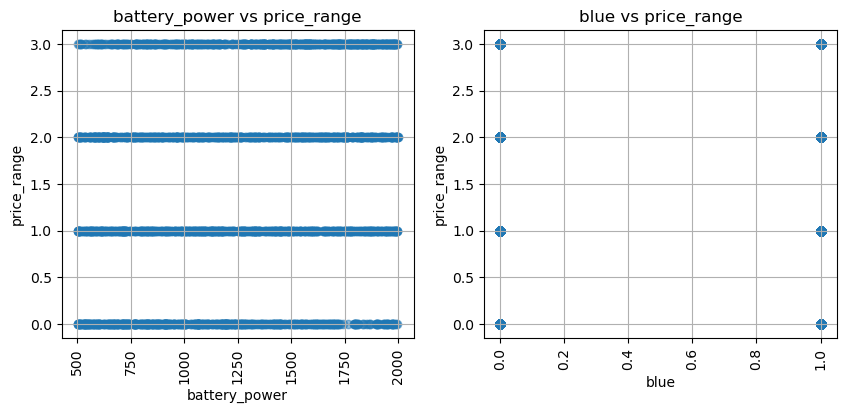

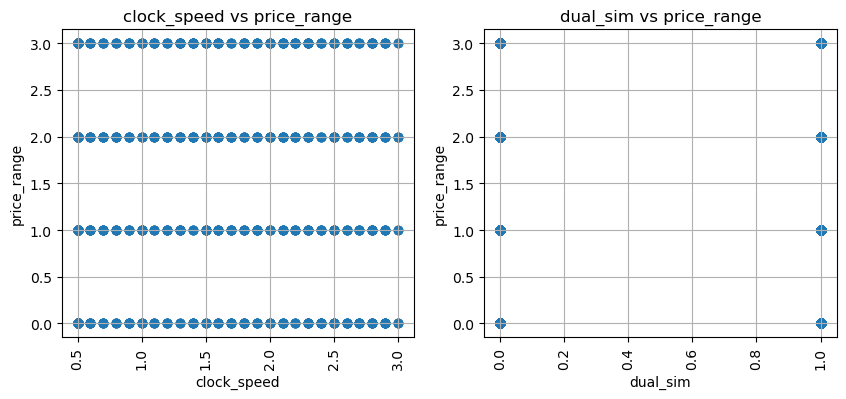

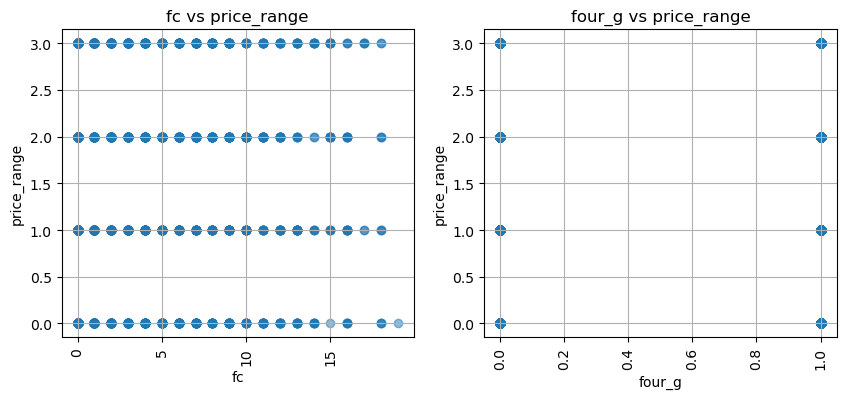

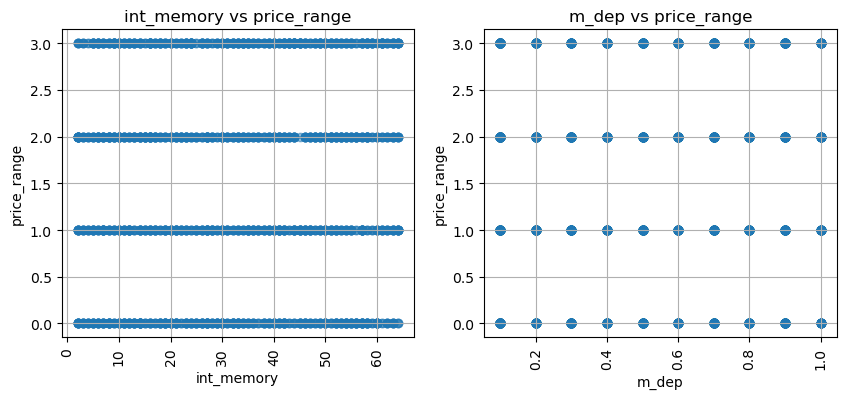

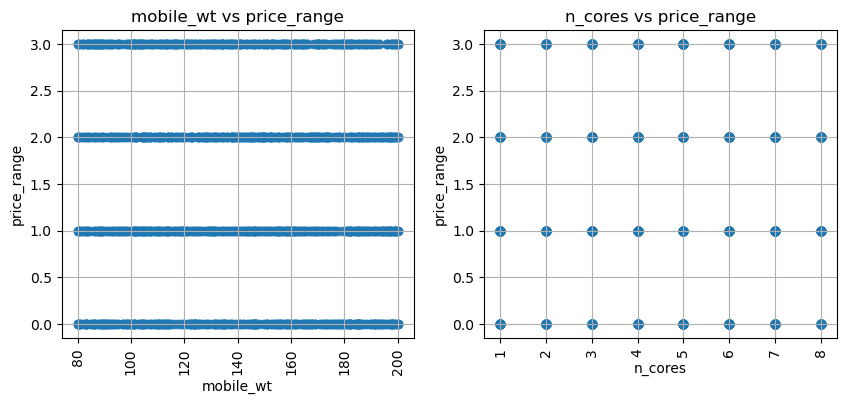

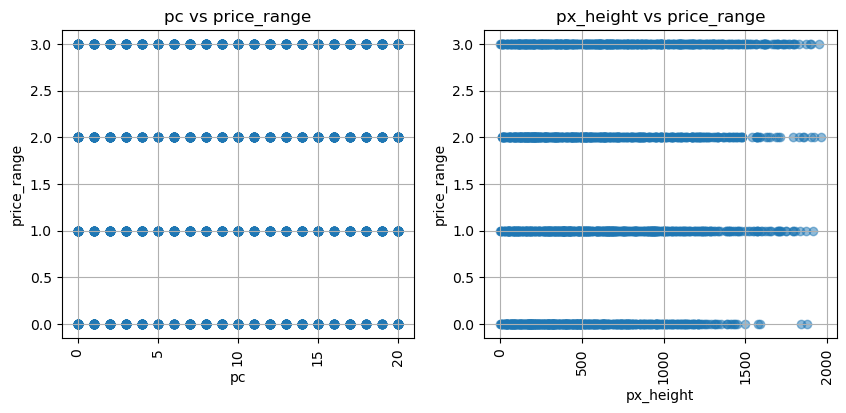

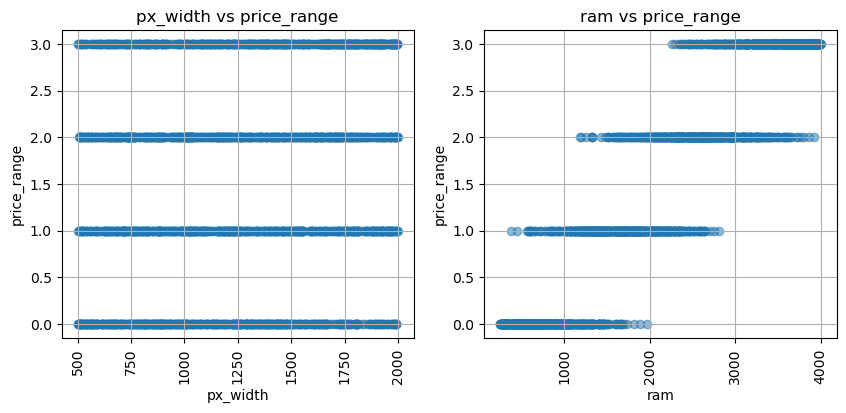

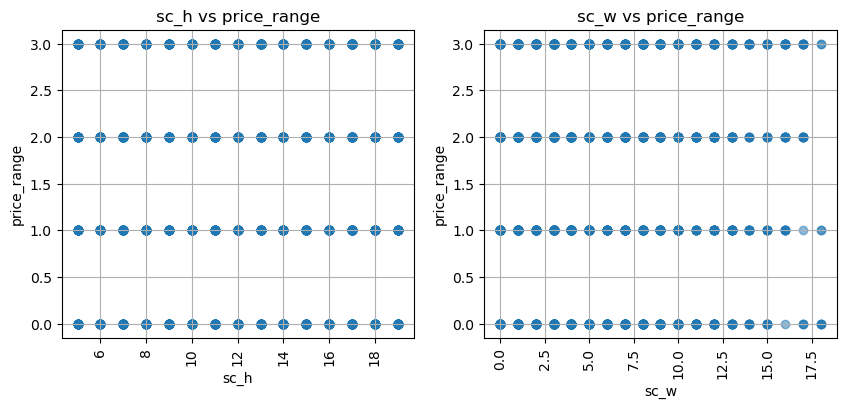

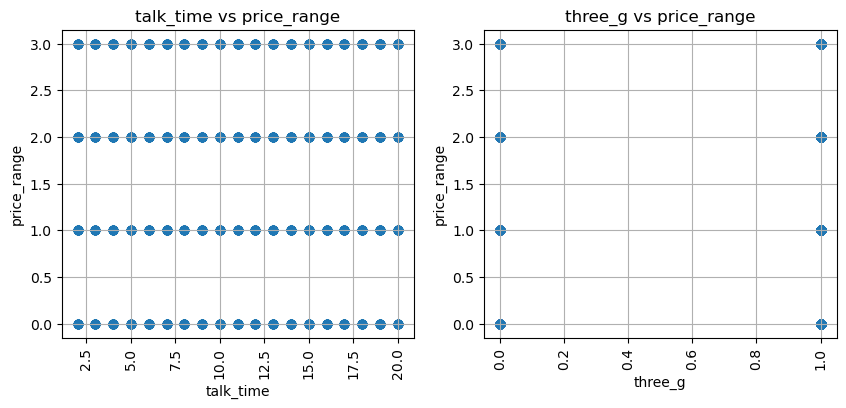

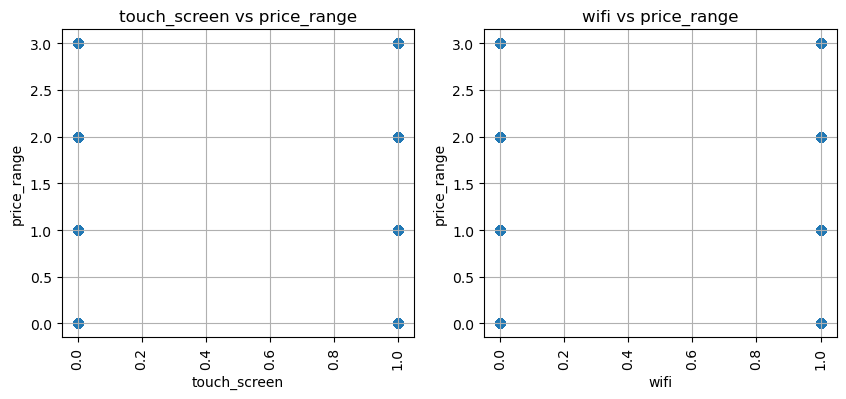

In [12]:
scatter_plot = list (df.drop ("price_range" , axis = 1))               
i =  0
while i < 20:
    plt.figure (figsize = [10 , 4])
    plt.subplot (1 , 2 , 1)   
    plt.scatter (df [scatter_plot [i]] , df ["price_range"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs price_range")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("price_range")
    plt.grid ()
    i += 1
    plt.subplot (1 , 2 , 2)
    plt.scatter (df [scatter_plot [i]] , df ["price_range"] , alpha = .5)
    plt.title (scatter_plot [i] + " vs price_range")
    plt.xlabel (scatter_plot [i])
    plt.xticks (rotation = 90)
    plt.ylabel ("price_range")
    plt.grid ()
    i += 1
    plt.show ()

in scatter plot of all columns we can see :
    - behavior of features with target
    - range of our feature (in numerical fetures)
    - classes of our features (in categorical fetures)
    - and many other things ...

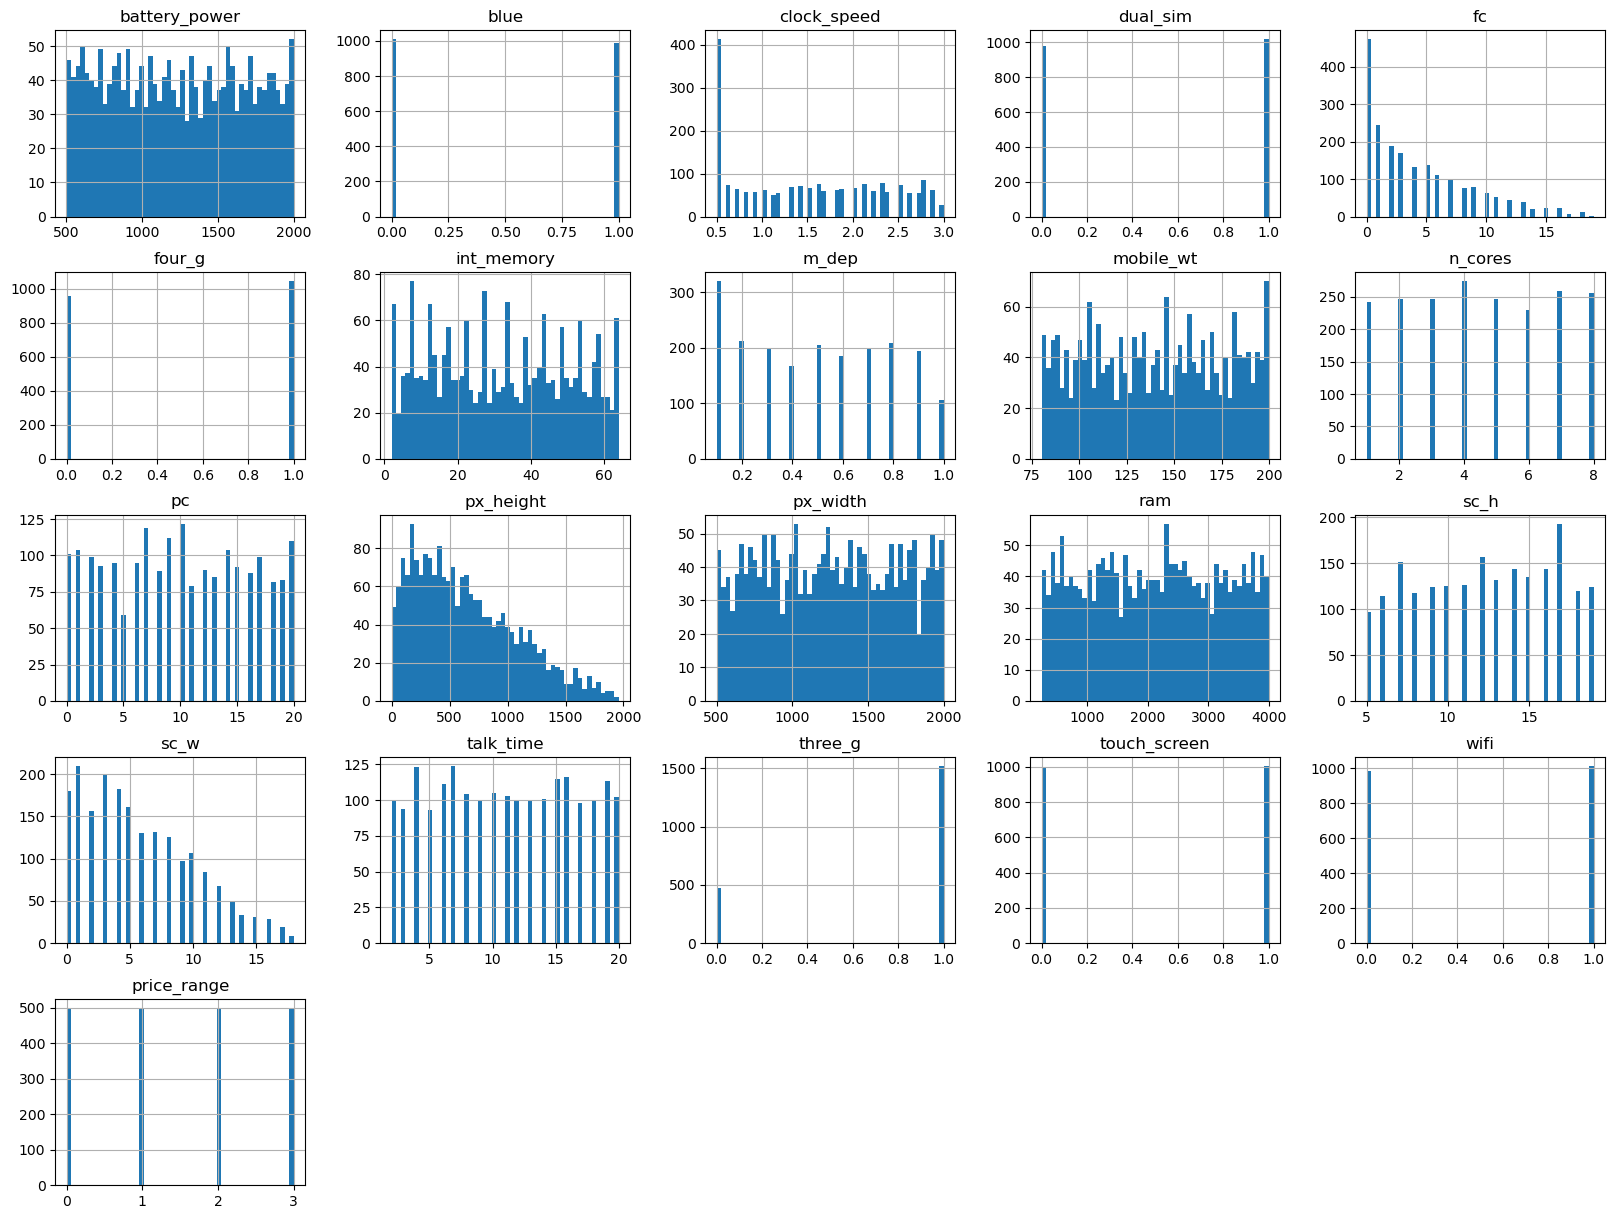

In [13]:
df.hist(bins=50,figsize=(20,15))    # hist for checking distribution
plt.show()

With this hist plot we can have a general sight of disturbution of our features

- There are bernoulli type of distribution in about 6 features
    
- There are many uniform distributions too 
    
- And one gamma type of distribution that is related to px_height column

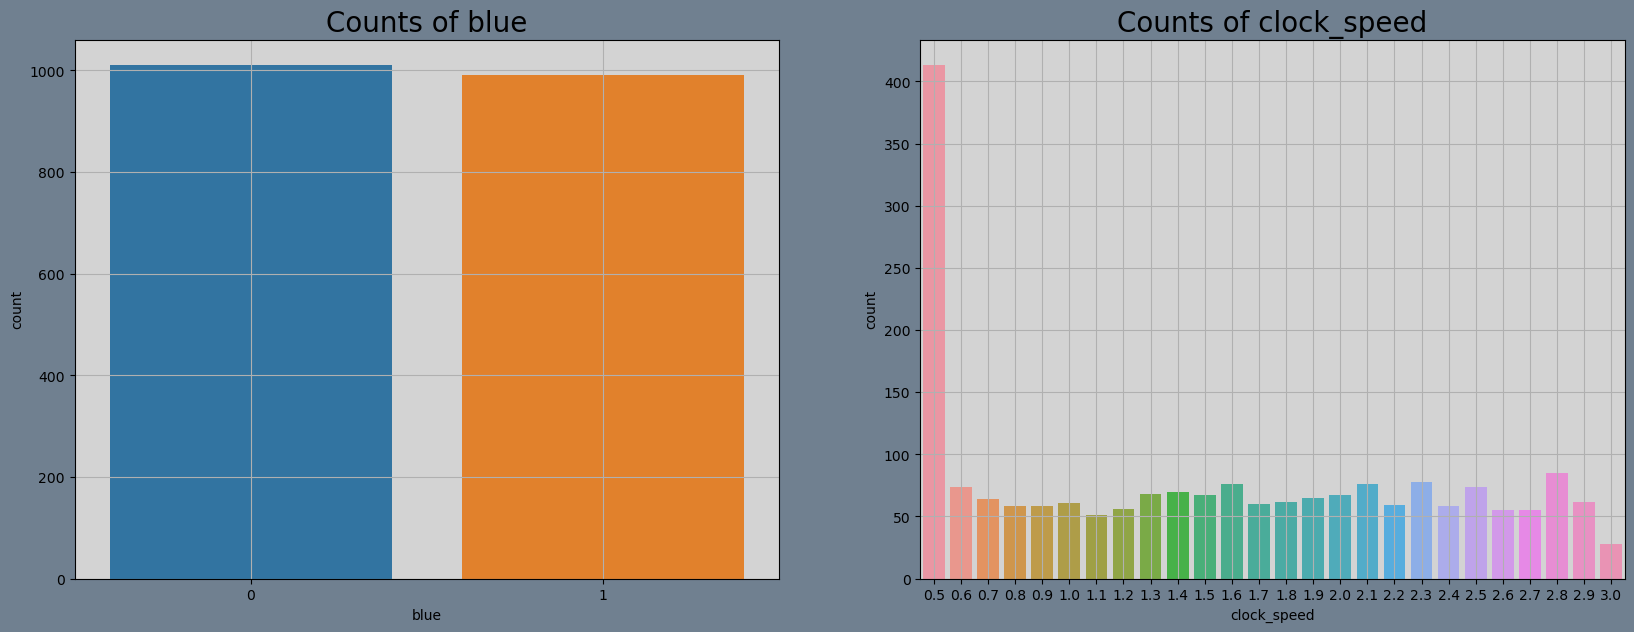

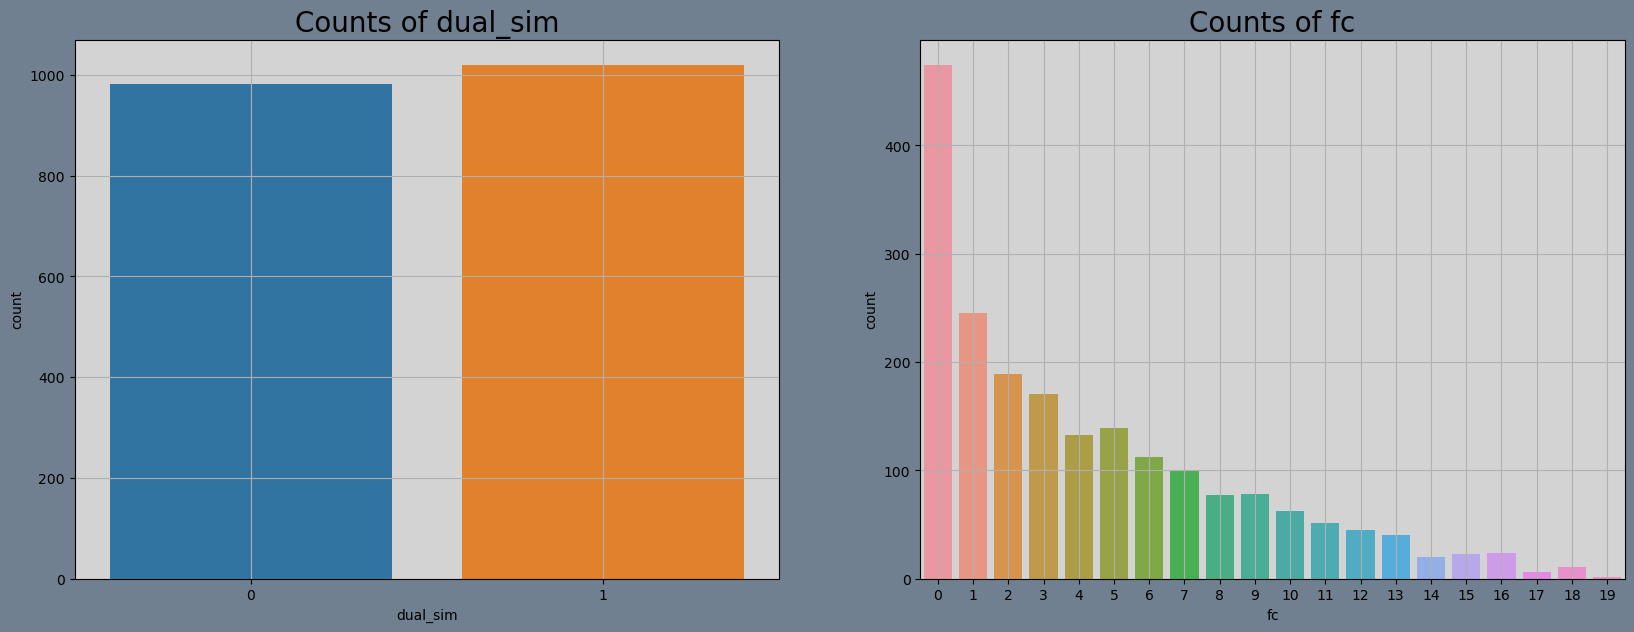

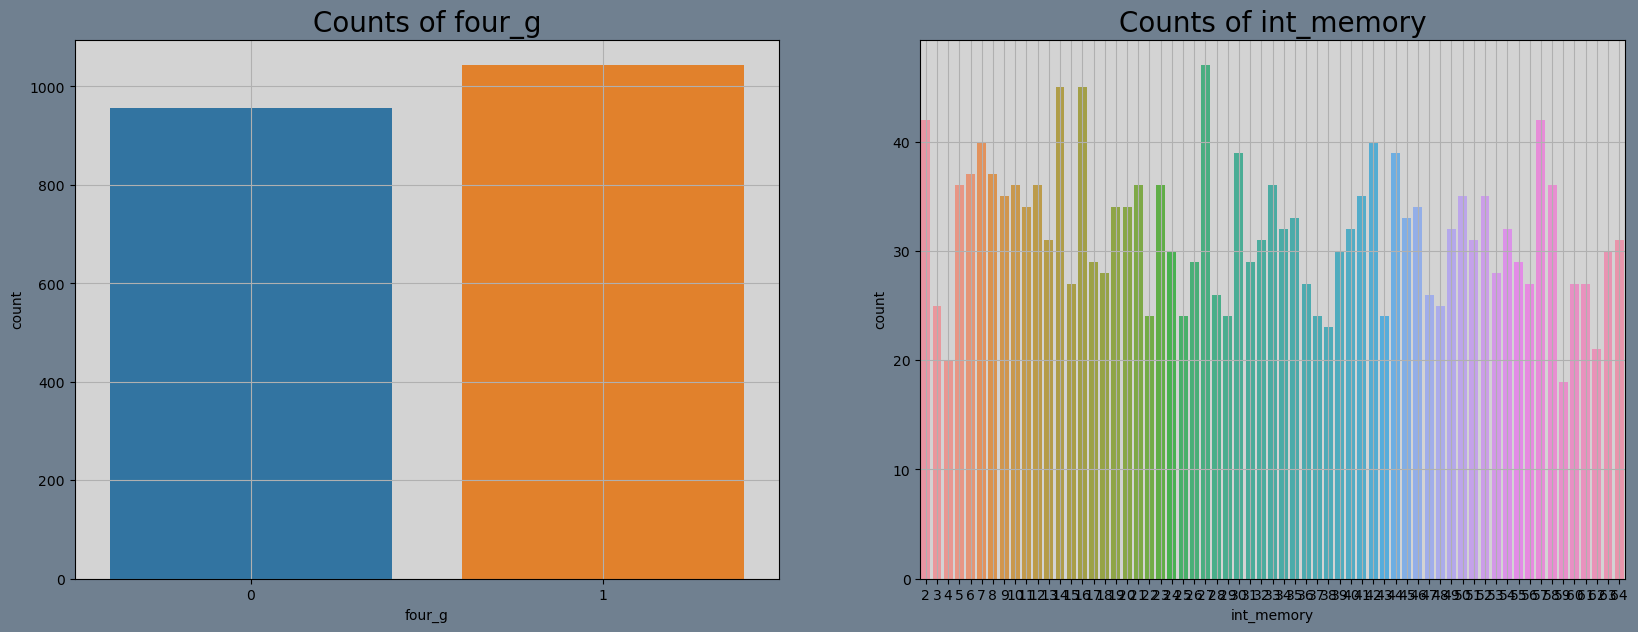

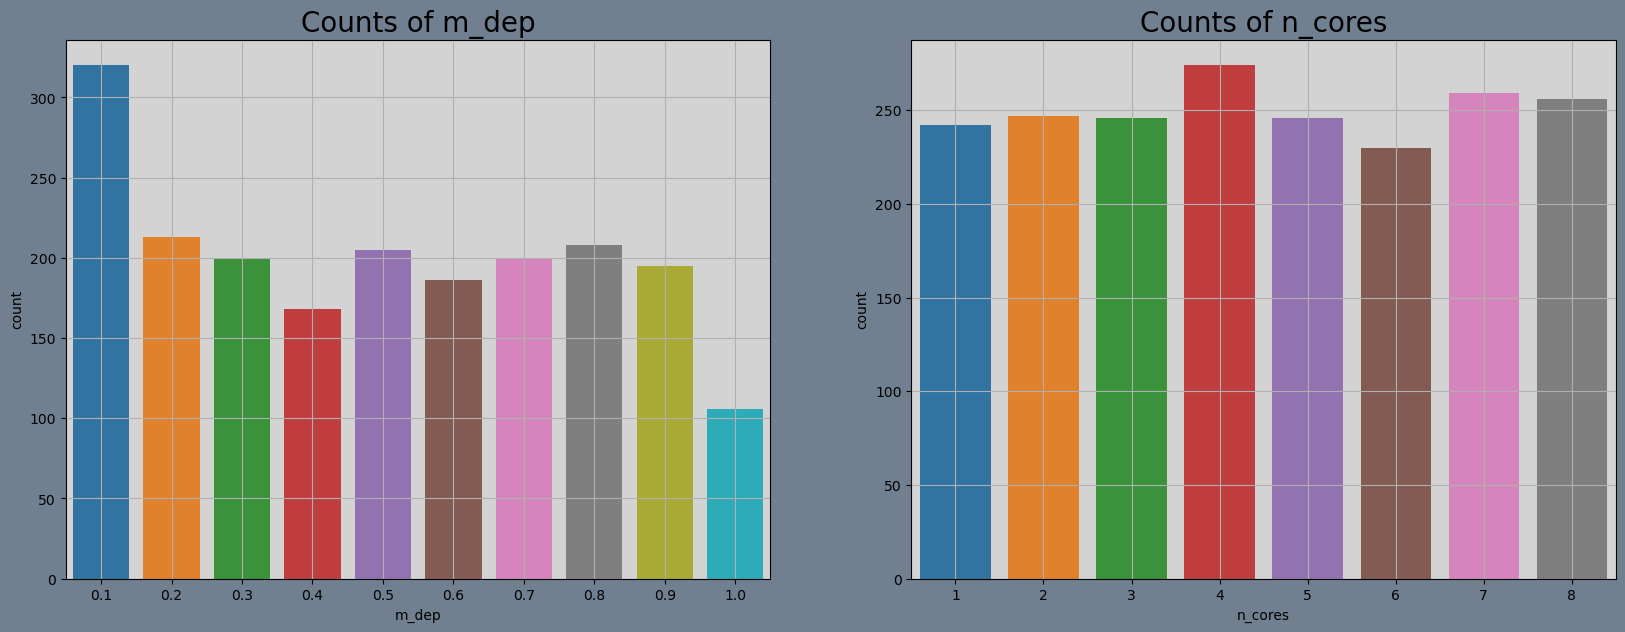

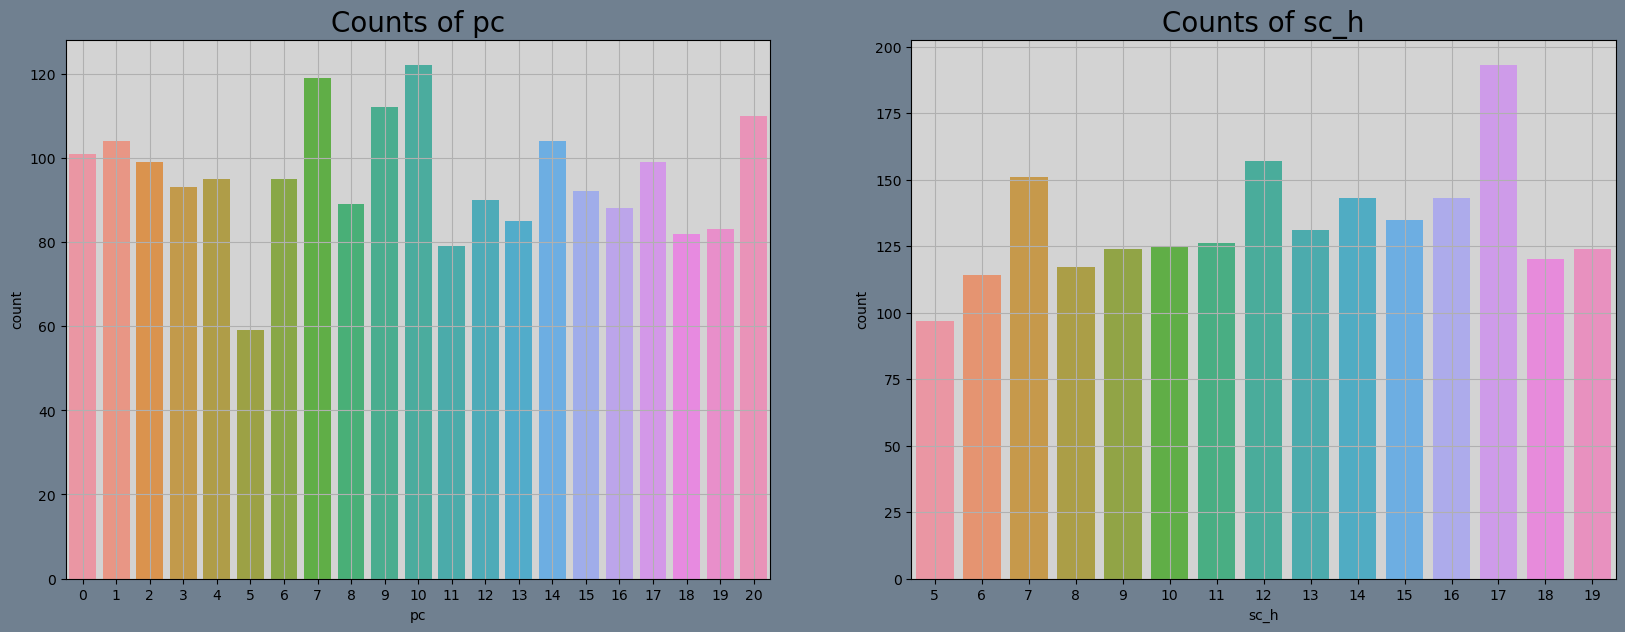

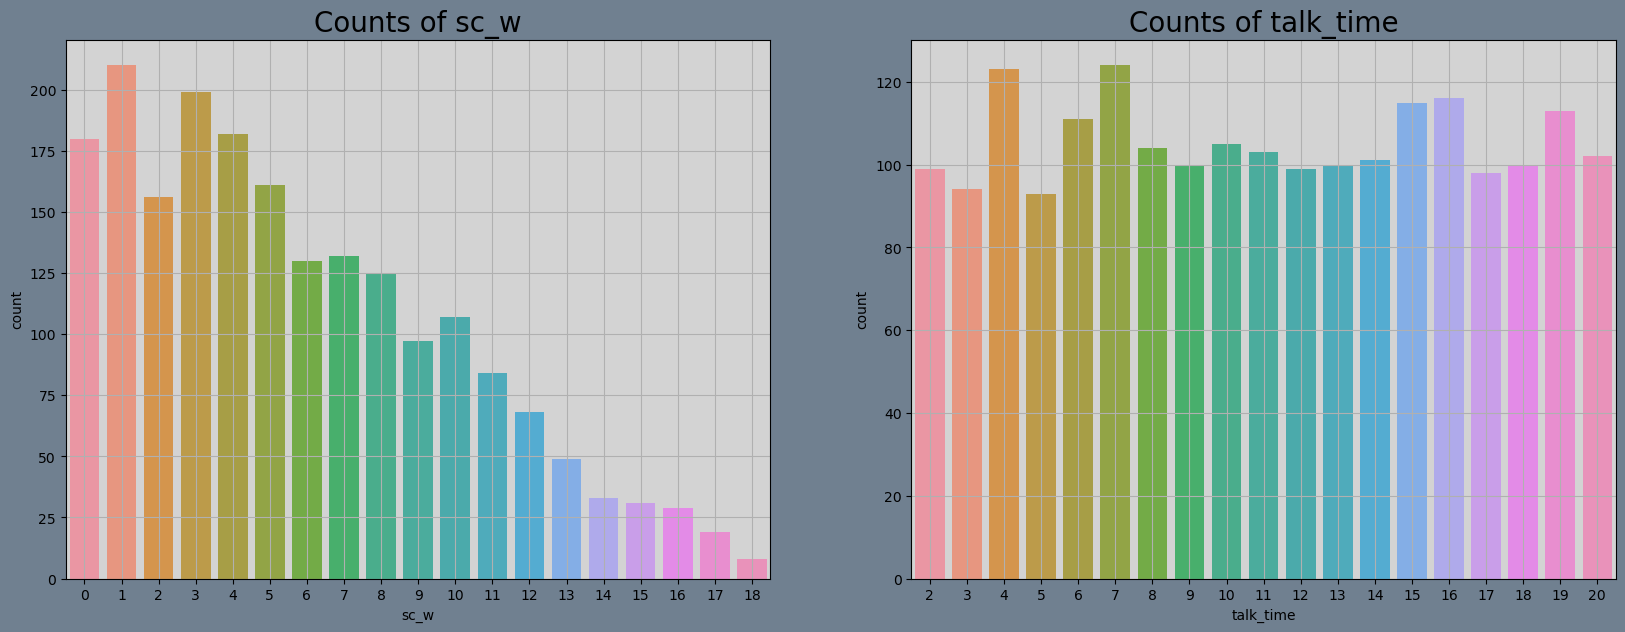

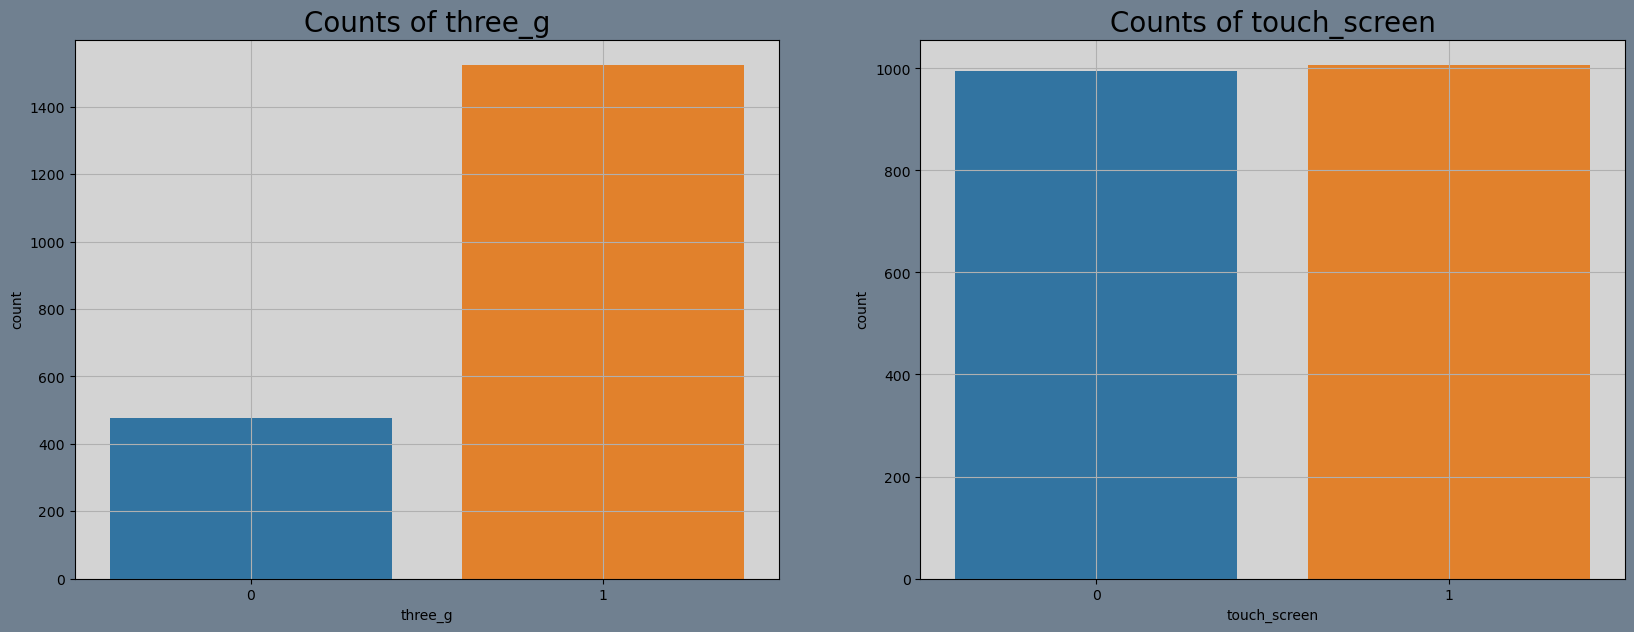

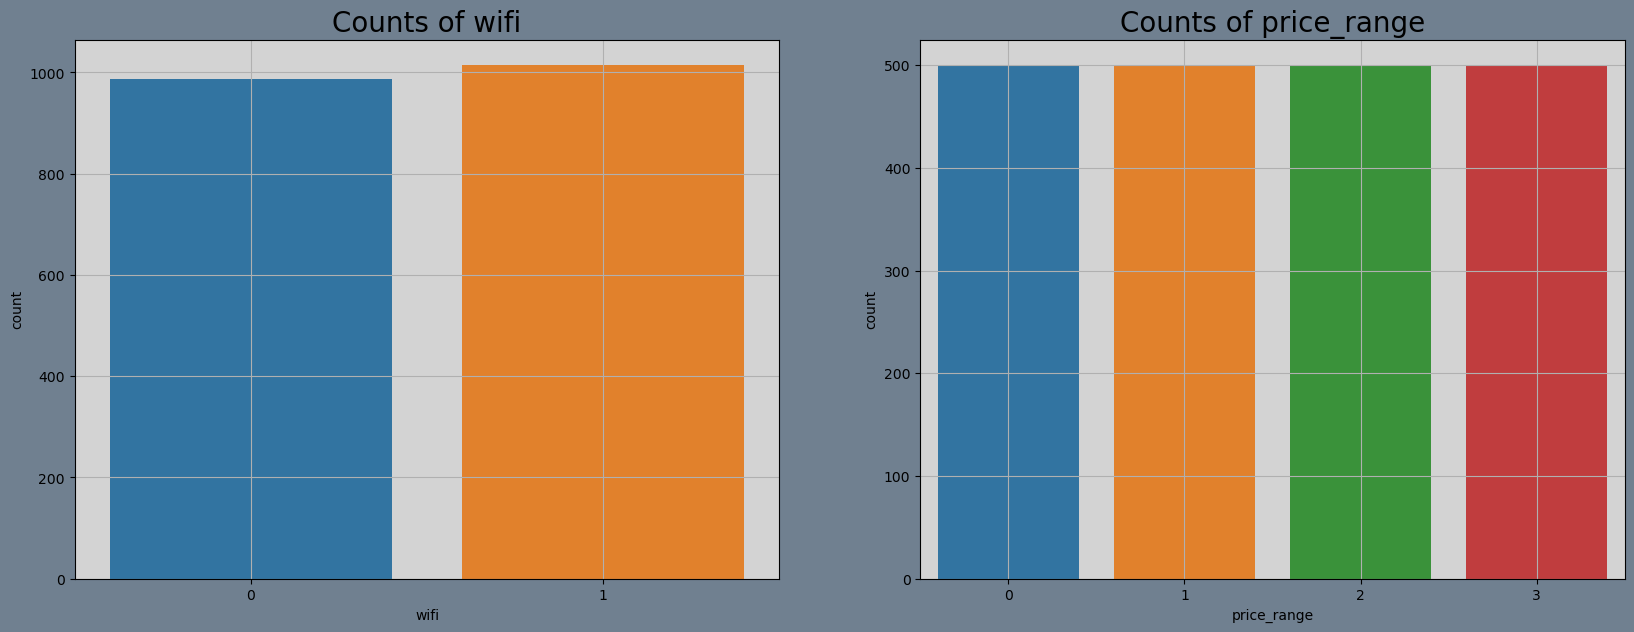

In [14]:
count_plot_columns = list (df.drop (['battery_power' , 'mobile_wt' , 'px_height', 'px_width' , 'ram'] , axis = 1))
i =  0

while i < len(count_plot_columns):
    fig = plt.figure(figsize = (20, 7), facecolor='slategray')
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=count_plot_columns[i], data=df)
    plt.title(f'Counts of {count_plot_columns[i]}', fontsize=20)  
    plt.grid ()
    plt.gca().set_facecolor('lightgray')
    i += 1

    if i < len(count_plot_columns):
        plt.subplot(1, 2, 2)
        sns.countplot(x=count_plot_columns[i], data=df)
        plt.title(f'Counts of {count_plot_columns[i]}', fontsize=20) 
        plt.grid ()
        plt.gca().set_facecolor('lightgray')
        i += 1

    plt.show()

these count plots gives us some information like :
- count of mobiles in every categorical features
- disturbution in some numerical features

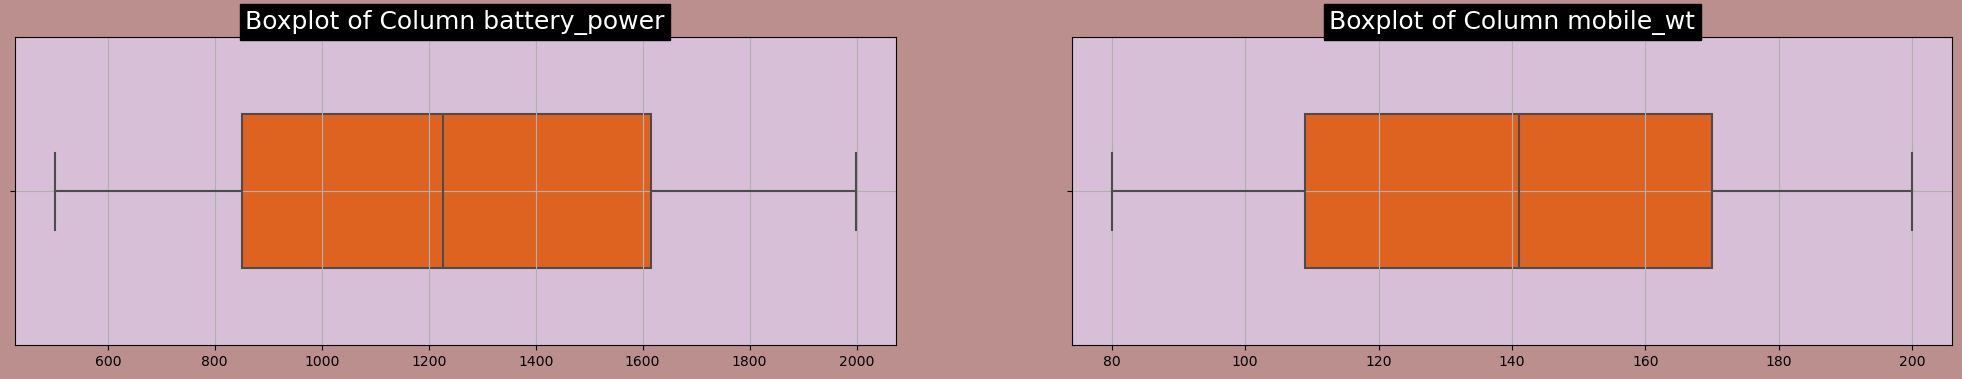

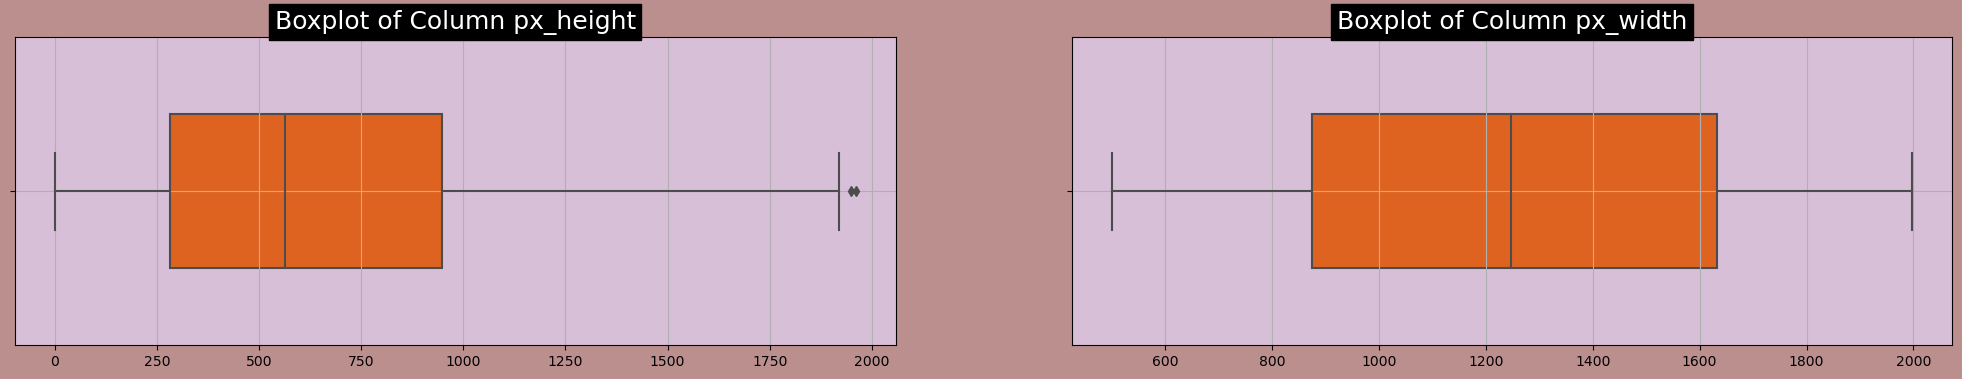

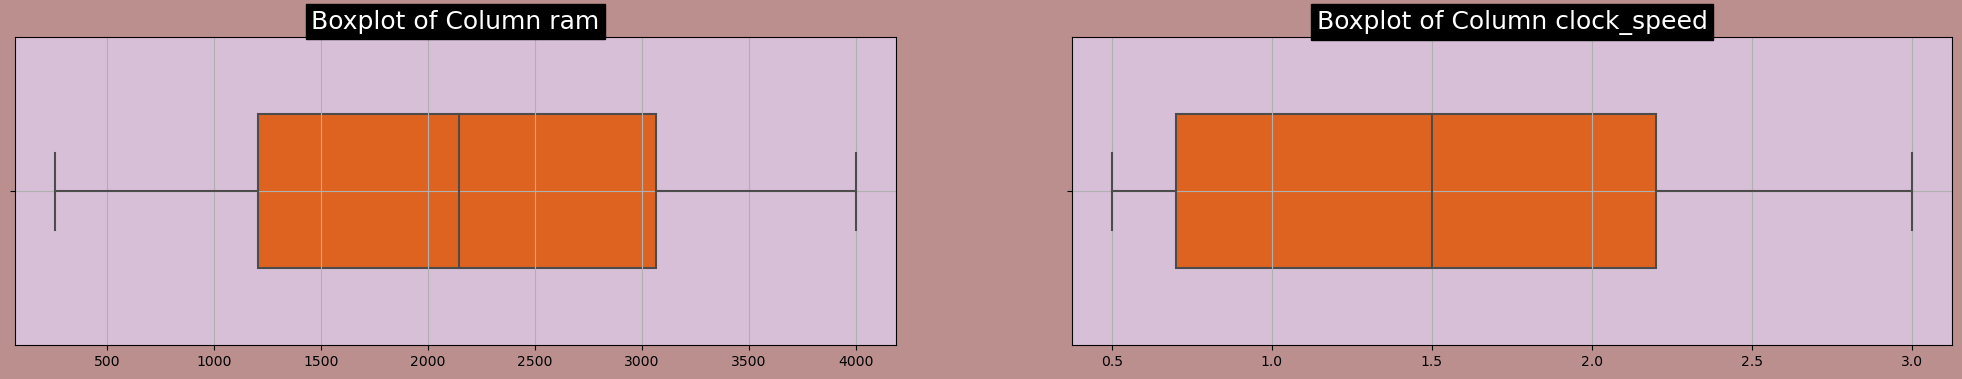

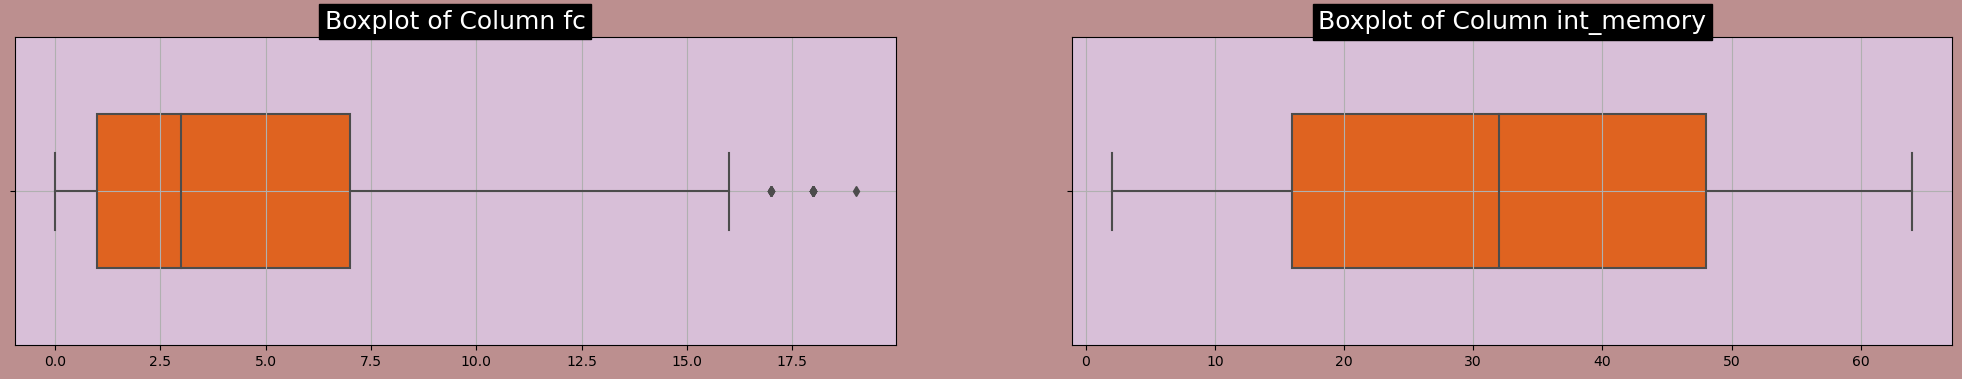

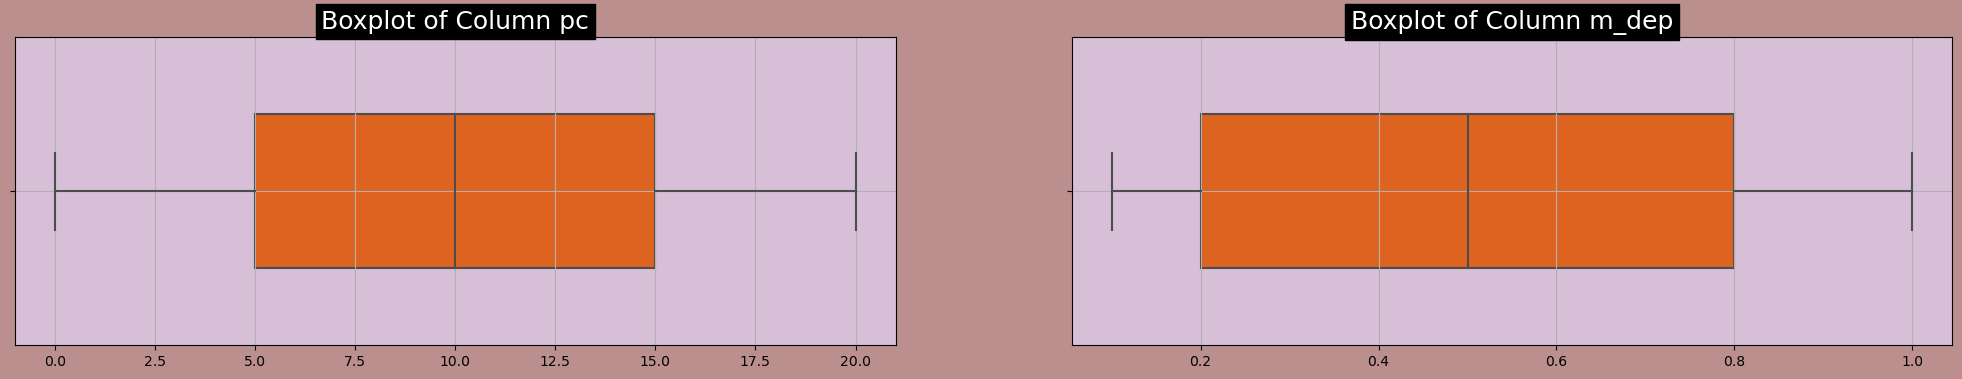

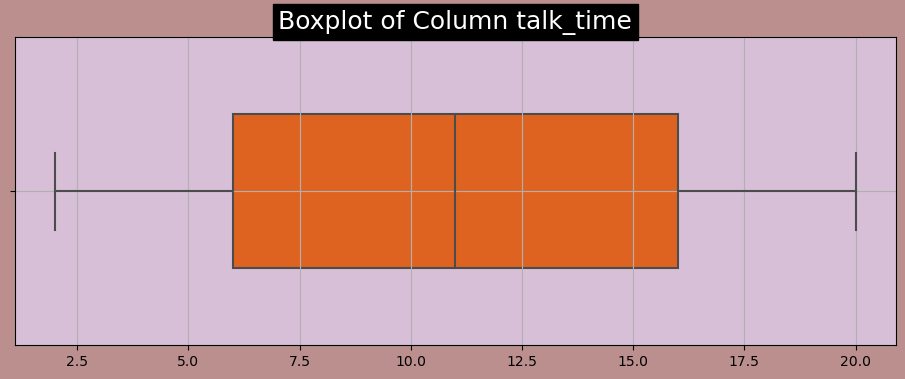

In [15]:
df_box = df[['battery_power' , 'mobile_wt' , 'px_height', 'px_width' , 'ram' , 'clock_speed' , 'fc' , 'int_memory' , 'pc' , 'm_dep' , 'talk_time']].columns
i =  0
while i < len(df_box):
    fig = plt.figure(figsize = (25, 4), facecolor='RosyBrown')
    
    plt.subplot (1 , 2 , 1)
    box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
    box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
    box.set(xlabel=None)
    box.set_facecolor('thistle')
    plt.grid()
    i += 1

    if i < len(df_box):
        plt.subplot (1 , 2 , 2)
        box = sns.boxplot(x=df_box [i], data=df, palette="hot_r", width=0.5, dodge=True )
        box.set_title("Boxplot of Column " + df_box [i] , fontsize=18 , backgroundcolor = 'black',color='white')
        box.set(xlabel=None)
        box.set_facecolor('thistle')
        plt.grid()
        i += 1

    plt.show()

In these box plots we can have a closer look for numerical features , checking noises in them and somehow the disturbution of these features

<AxesSubplot:>

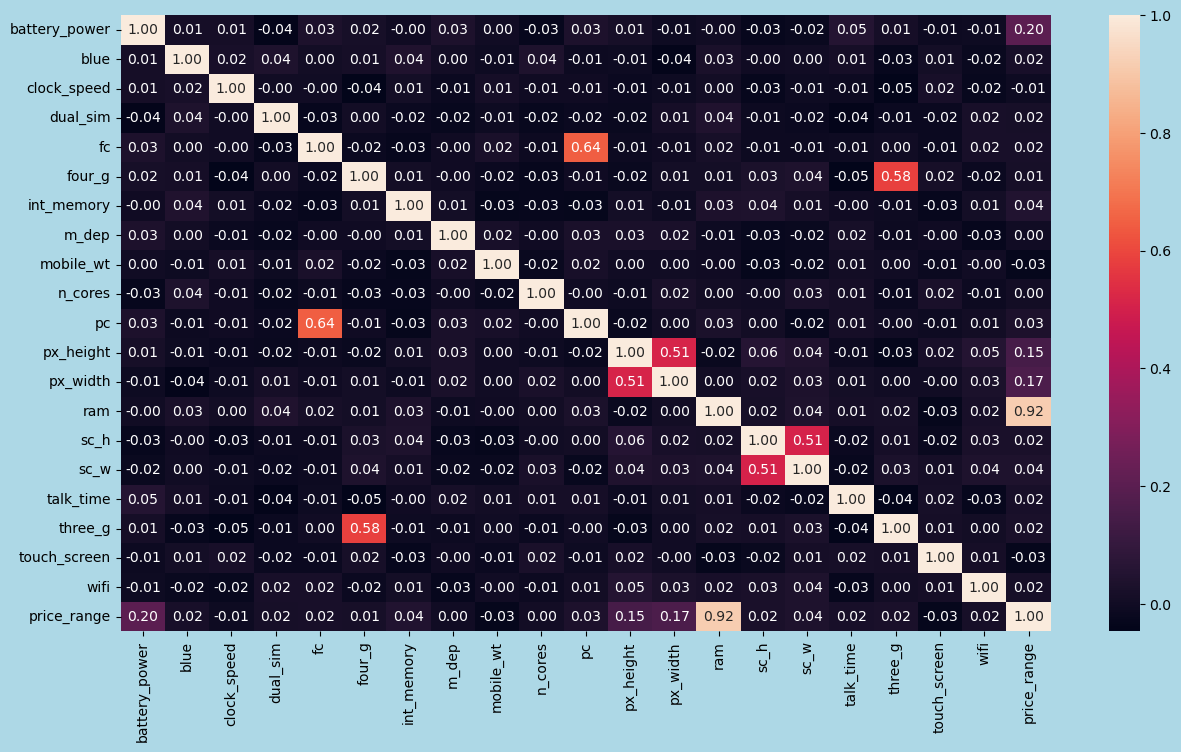

In [16]:
fig = plt.figure(figsize = (15, 8), facecolor='lightblue')
sns.heatmap(df.corr() , annot=True , fmt=".2f")

In this correlation by sns.heatmap we can analyze the relation between all features To one another and to target (price range)

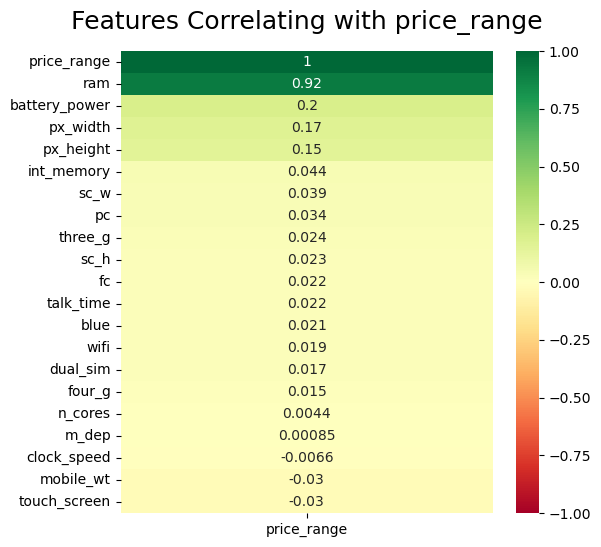

In [17]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(df.corr()[['price_range']].sort_values(by='price_range', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with price_range', fontdict={'fontsize':18}, pad=16);

# Models

In [24]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [25]:
df = df.drop (['px_height','px_width', 'sc_h', 'sc_w'] , axis = 1)

In [26]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,668,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,2032,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,3057,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,869,19,1,1,1,0


As i said in preprocessing section we should remove these 4 columns for our models to have more real and logical data and prediction

# Decision tree

In [27]:
## first model
# feature selection 
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .2 , random_state = 0)

# model 
DTs = DecisionTreeClassifier ( random_state = 0)
# train & predict
DTs.fit (x_train , y_train.ravel())
y_pred = DTs.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.7325


checking for best test size

In [28]:
## checking test size
accuracy_df = pd.DataFrame(columns=['Test Size', 'Accuracy'])
for i in np.arange(.10, .35, .01):
    x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = round(i, 2) , random_state = 0)

    DTs = DecisionTreeClassifier (random_state = 0)
    DTs.fit (x_train , y_train.ravel())
    y_pred = DTs.predict (x_test) 

    accuracy_score = metrics.accuracy_score (y_test , y_pred)
    accuracy_df = accuracy_df.append({'Test Size': round(i, 2), 'Accuracy': accuracy_score}, ignore_index=True)

In [29]:
top3_accuracy = accuracy_df.nlargest(3, 'Accuracy') 
top3_accuracy

,Test Size,Accuracy
1,0.11,0.795455
3,0.13,0.792308
0,0.10,0.785000


test size => .11 have the highest accuracy so we continue improving model with this test size.

GridSearchCV

In [30]:
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = 0.11 , random_state = 0)
param_grid = {'criterion' :['gini', 'entropy'] , 
              'max_depth' : range (3 , 30 , 1) , 
             'min_samples_split' : range (1 , 20 , 1) ,
             'min_samples_leaf' : range (1 , 20 , 1) ,}  

DTs = DecisionTreeClassifier (random_state = 0)
clf = GridSearchCV (DTs , param_grid, cv=5 , n_jobs = -1)

clf.fit(x_train , y_train.ravel ())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 30),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(1, 20)})

In [31]:
print(clf.best_params_) 

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 19, 'min_samples_split': 2}


In [32]:
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = 0.11 , random_state = 0)
DTs1 = DecisionTreeClassifier (criterion= 'gini',max_depth= 6, min_samples_leaf= 19, min_samples_split= 2 ,random_state = 0)
DTs1.fit (x_train , y_train.ravel())
y_pred = DTs1.predict (x_test) 
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.7863636363636364


In [33]:
# checking loss functions 
print ( classification_report ( y , DTs1.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.91      0.91      0.91       500

           1       0.81      0.78      0.80       500

           2       0.72      0.86      0.78       500

           3       0.94      0.81      0.87       500



    accuracy                           0.84      2000

   macro avg       0.85      0.84      0.84      2000

weighted avg       0.85      0.84      0.84      2000




GridSearchCV parameters don't improved our accuracy score so i want to check different parameters manually

color:white'>manually changing parameters for a better training

In [34]:
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .11 , random_state = 0)

In [35]:
values = range (1 , 30)
accuracy_values = []

for i in values:
    DTs = DecisionTreeClassifier ( criterion = 'gini',max_depth = i , random_state = 0)
    DTs.fit(x_train, y_train)
    y_pred = DTs.predict(x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'max_values': values,
    'Accuracy': accuracy_values
})

In [36]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

max_values    8.000000
Accuracy      0.813636
Name: 7, dtype: float64

In [37]:
values = range (1 , 30)
accuracy_values = []

for i in values:
    DTs = DecisionTreeClassifier ( criterion = 'gini',max_depth = 8 , random_state = 0 ,
                                 min_samples_leaf = i)
    DTs.fit(x_train, y_train)
    y_pred = DTs.predict(x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'leaf_values': values,
    'Accuracy': accuracy_values
})

In [38]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

leaf_values    9.000000
Accuracy       0.845455
Name: 8, dtype: float64

In [39]:
values = range (2 , 30 , 1)
accuracy_values = []

for i in values:
    DTs = DecisionTreeClassifier ( criterion = 'gini',max_depth = 8 , random_state = 0 ,
                                 min_samples_leaf = 9 , min_samples_split = i)
    DTs.fit(x_train, y_train)
    y_pred = DTs.predict(x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'split_values': values,
    'Accuracy': accuracy_values
})

In [40]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

split_values    20.00
Accuracy         0.85
Name: 18, dtype: float64

In [41]:
# finall model 
DTs2 = DecisionTreeClassifier ( criterion = 'gini',max_depth = 8, min_samples_leaf = 9,
                               random_state = 0 , min_samples_split = 20)
# train & predict
DTs2.fit (x_train , y_train.ravel())
y_pred = DTs2.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.85


In [42]:
# checking loss functions 
print ( classification_report ( y , DTs2.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.91      0.93      0.92       500

           1       0.84      0.82      0.83       500

           2       0.82      0.82      0.82       500

           3       0.90      0.91      0.90       500



    accuracy                           0.87      2000

   macro avg       0.87      0.87      0.87      2000

weighted avg       0.87      0.87      0.87      2000




    
I got better answer and accuracy from changing the parameters

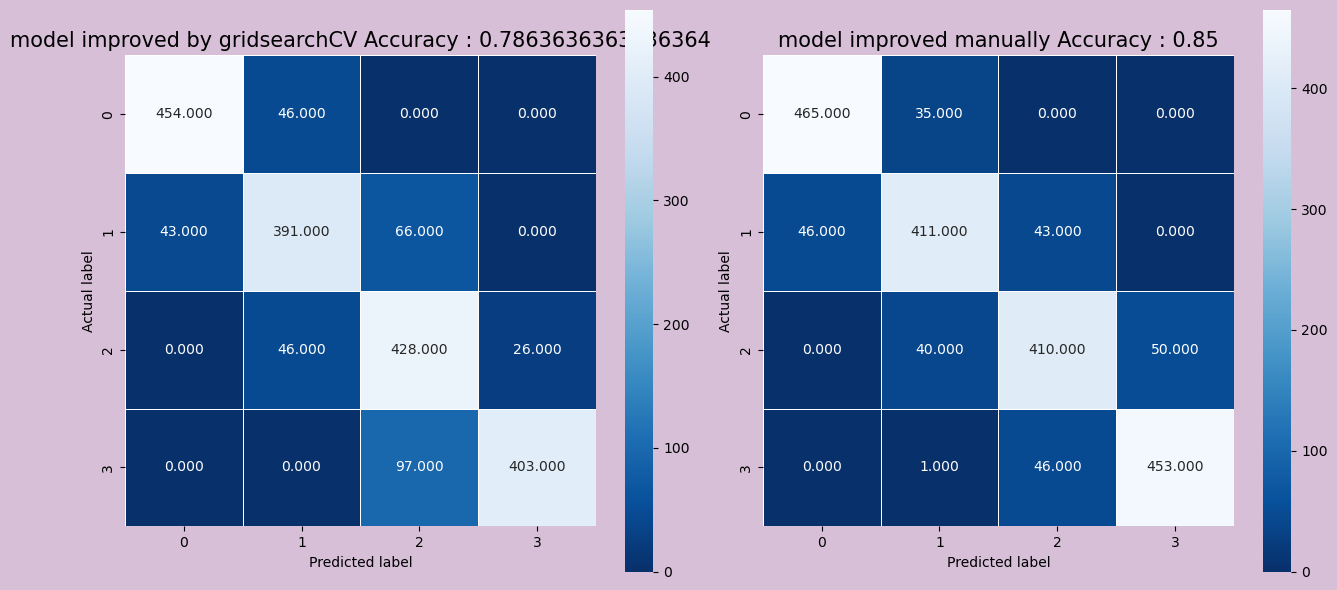

In [43]:
cm1 = confusion_matrix (y , DTs1.predict (x_norm))
score1 = DTs1.score(x_test, y_test)

cm2 = confusion_matrix (y , DTs2.predict (x_norm))
score2 = DTs2.score(x_test, y_test)

fig = plt.figure(figsize = (13, 6), facecolor='thistle')

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'model improved by gridsearchCV Accuracy : {0}'.format(score1)
plt.title(all_sample_title, size = 15)

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'model improved manually Accuracy : {0}'.format(score2)
plt.title(all_sample_title, size = 15)

plt.tight_layout()
plt.show()

    
By comparing these two plots we can see the model which improved by changing parameters manually had better accuracy and prediction.
    
So the i got .85 accuracy score and a good prediction with decision tree algorithm.

# Random forest

In [44]:
## first model
# feature selection 
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .2 , random_state = 0)

# model 
RF = RandomForestClassifier (random_state = 0) 
# train & predict
RF.fit (x_train , y_train.ravel())
y_pred = RF.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.7975


checking for best test size
    

In [45]:
## checking test size
accuracy_df = pd.DataFrame(columns=['Test Size', 'Accuracy'])
for i in np.arange(.10, .35, .01):
    x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = round(i, 2) , random_state = 0)


    RF = RandomForestClassifier (random_state = 0) 
    RF.fit (x_train , y_train.ravel())
    y_pred = RF.predict (x_test)

    accuracy_score = metrics.accuracy_score (y_test , y_pred)
    accuracy_df = accuracy_df.append({'Test Size': round(i, 2), 'Accuracy': accuracy_score}, ignore_index=True)

In [46]:
top3_accuracy = accuracy_df.nlargest(3, 'Accuracy') 
top3_accuracy

,Test Size,Accuracy
2,0.12,0.825000
16,0.26,0.825000
8,0.18,0.816667


    
test size = .12 & .26 are the same and the have highest accuracy so i want to check both of them

In [47]:
# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .12 , random_state = 0)

# model 
RF1 = RandomForestClassifier (random_state = 0) 
# train & predict
RF1.fit (x_train , y_train.ravel())
y_pred = RF1.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.825


In [48]:
# checking loss functions 
print ( classification_report ( y , RF1.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.99      0.99      0.99       500

           1       0.97      0.98      0.98       500

           2       0.98      0.96      0.97       500

           3       0.98      0.99      0.98       500



    accuracy                           0.98      2000

   macro avg       0.98      0.98      0.98      2000

weighted avg       0.98      0.98      0.98      2000




In [49]:
# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .26 , random_state = 0)

# model 
RF2 = RandomForestClassifier (random_state = 0) 
# train & predict
RF2.fit (x_train , y_train.ravel())
y_pred = RF2.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.825


In [50]:
# checking loss functions 
print ( classification_report ( y , RF2.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.97      0.98      0.98       500

           1       0.94      0.94      0.94       500

           2       0.94      0.93      0.93       500

           3       0.97      0.97      0.97       500



    accuracy                           0.95      2000

   macro avg       0.95      0.95      0.95      2000

weighted avg       0.95      0.95      0.95      2000




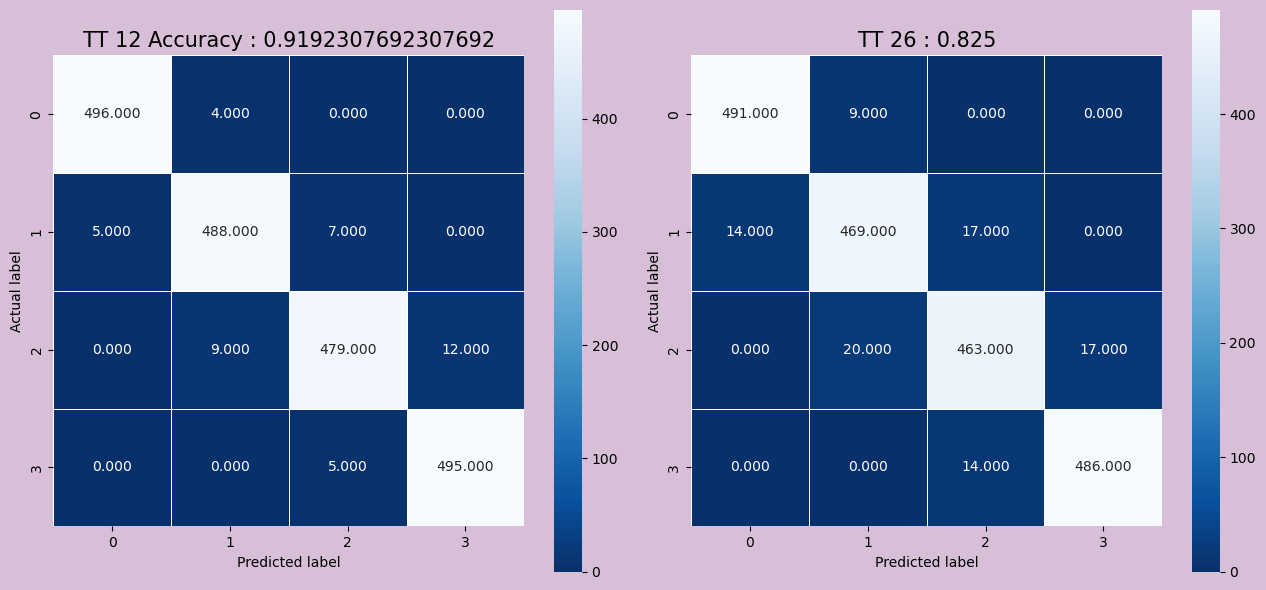

In [51]:
cm1 = confusion_matrix (y , RF1.predict (x_norm))
score1 = RF1.score(x_test, y_test)

cm2 = confusion_matrix (y , RF2.predict (x_norm))
score2 = RF2.score(x_test, y_test)

fig = plt.figure(figsize = (13, 6), facecolor='thistle')

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'TT 12 Accuracy : {0}'.format(score1)
plt.title(all_sample_title, size = 15)

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'TT 26 : {0}'.format(score2)
plt.title(all_sample_title, size = 15)

plt.tight_layout()
plt.show()

    
They have same accuracy score but model with test size .12 works and predicts much better

GridSearchCV

In [52]:
'''x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = 0.12 , random_state = 0)
param_grid = {'criterion' :['gini', 'entropy'] , 
              'n_estimators' : range (1 , 200 , 1) , 
             'max_depth' : range (3 , 30 , 1) ,
             'min_samples_leaf' : range (1 , 20 , 1) ,
             'min_samples_split' : range (1 , 20 , 1)
             }  

RF = RandomForestClassifier (random_state = 0) 
clf = GridSearchCV (RF , param_grid, cv=5 , n_jobs = -1)

clf.fit(x_train , y_train.ravel ())'''

"x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = 0.12 , random_state = 0)\nparam_grid = {'criterion' :['gini', 'entropy'] , \n              'n_estimators' : range (1 , 200 , 1) , \n             'max_depth' : range (3 , 30 , 1) ,\n             'min_samples_leaf' : range (1 , 20 , 1) ,\n             'min_samples_split' : range (1 , 20 , 1)\n             }  \n\nRF = RandomForestClassifier (random_state = 0) \nclf = GridSearchCV (RF , param_grid, cv=5 , n_jobs = -1)\n\nclf.fit(x_train , y_train.ravel ())"

It is a code for GridSearchCV but is takes a very long time for running and output and its not always giving us the best parameters so we check for best values by another way

manually changing parameters for a better training

In [53]:
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .12 , random_state = 0)

In [54]:
max_depth_values = range (3 , 30)
accuracy_values = []

for i in max_depth_values:
    RF2 = RandomForestClassifier (random_state = 0 , max_depth = i) 
    RF2.fit (x_train , y_train.ravel())
    y_pred = RF2.predict (x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'max_depth_values': max_depth_values,
    'Accuracy': accuracy_values
})

In [55]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

max_depth_values    21.000000
Accuracy             0.829167
Name: 18, dtype: float64

In [56]:
n_estimators_values = range (50 , 250)
accuracy_values = []

for i in n_estimators_values:
    RF2 = RandomForestClassifier (random_state = 0 , max_depth = 21 , n_estimators = i) 
    RF2.fit (x_train , y_train.ravel())
    y_pred = RF2.predict (x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'n_estimators_values': n_estimators_values,
    'Accuracy': accuracy_values
})

In [57]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

n_estimators_values    115.0000
Accuracy                 0.8375
Name: 65, dtype: float64

In [58]:
min_samples_leaf_values = range (2 , 30 , 1)
accuracy_values = []

for i in min_samples_leaf_values:
    RF2 = RandomForestClassifier (random_state = 0 , n_estimators = 115 , max_depth = 21 , 
                                 min_samples_leaf = i) 
    RF2.fit (x_train , y_train.ravel())
    y_pred = RF2.predict (x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'min_samples_leaf_values': min_samples_leaf_values,
    'Accuracy': accuracy_values
})

In [59]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

min_samples_leaf_values    11.0000
Accuracy                    0.8125
Name: 9, dtype: float64

In [60]:
min_samples_split_values = range (2 , 20 , 1)
accuracy_values = []

for i in min_samples_split_values:
    RF2 = RandomForestClassifier (random_state = 0 , n_estimators = 115 , max_depth = 21 , 
                                  min_samples_split = i) 
    RF2.fit (x_train , y_train.ravel())
    y_pred = RF2.predict (x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'split_values': min_samples_split_values,
    'Accuracy': accuracy_values
})

In [61]:
max_accuracy_row = df4.loc[df4['Accuracy'].idxmax()]
max_accuracy_row

split_values    2.0000
Accuracy        0.8375
Name: 0, dtype: float64

In [62]:
##### funal model 

# feature selection 
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .12 , random_state = 0)

# model 
RF = RandomForestClassifier (random_state = 0 , n_estimators = 115 , max_depth = 21) 
# train & predict
RF.fit (x_train , y_train.ravel())
y_pred = RF.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.8375


    
I improved my model with changing the values of some parameters

In [63]:
# checking loss functions 
print ( classification_report ( y , RF2.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.93      0.97      0.95       500

           1       0.87      0.87      0.87       500

           2       0.88      0.85      0.86       500

           3       0.94      0.94      0.94       500



    accuracy                           0.91      2000

   macro avg       0.91      0.91      0.91      2000

weighted avg       0.91      0.91      0.91      2000




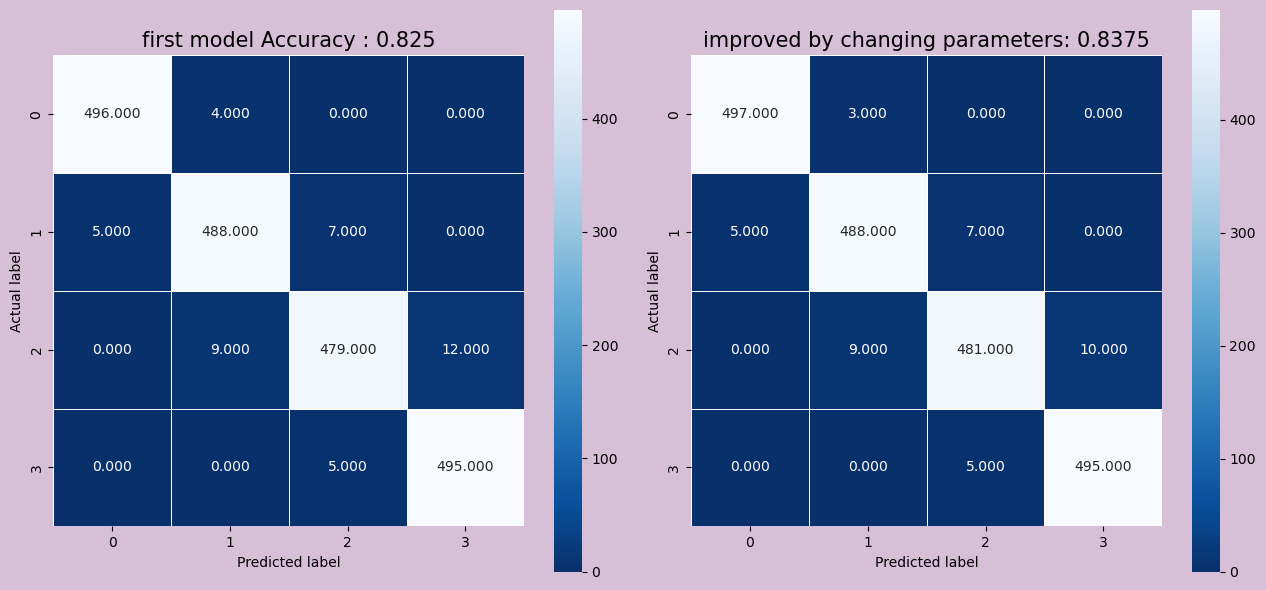

In [64]:
cm1 = confusion_matrix (y , RF1.predict (x_norm))
score1 = RF1.score(x_test, y_test)

cm2 = confusion_matrix (y , RF.predict (x_norm))
score2 = RF.score(x_test, y_test)

fig = plt.figure(figsize = (13, 6), facecolor='thistle')

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'first model Accuracy : {0}'.format(score1)
plt.title(all_sample_title, size = 15)

plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'improved by changing parameters: {0}'.format(score2)
plt.title(all_sample_title, size = 15)

plt.tight_layout()
plt.show()

    
As you can see the improved model have less errors and predicts better

Also this algorithm predict the samples of this dataset very nice

# SVM (Support Vector Machine)

In [65]:
##### first model 

# feature selection 
x = df.drop ("price_range" , axis = 1)
y = df.price_range.values.reshape (-1 , 1)

# scaling
Scaler = StandardScaler ()
x_norm = Scaler.fit_transform (x)

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .2 , random_state = 0)

# model 
SVM = SVC () 
# train & predict
SVM.fit (x_train , y_train.ravel())
y_pred = SVM.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.79


checking for best test size
    

In [66]:
## checking test size
accuracy_df = pd.DataFrame(columns=['Test Size', 'Accuracy'])
for i in np.arange(.10, .35, .01):
    x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = round(i, 2) , random_state = 0)


    SVM = SVC () 
    SVM.fit (x_train , y_train.ravel())
    y_pred = SVM.predict (x_test)

    accuracy_score = metrics.accuracy_score (y_test , y_pred)
    accuracy_df = accuracy_df.append({'Test Size': round(i, 2), 'Accuracy': accuracy_score}, ignore_index=True)

In [67]:
top3_accuracy = accuracy_df.nlargest(3, 'Accuracy') 
top3_accuracy

,Test Size,Accuracy
5,0.15,0.82
4,0.14,0.80
6,0.16,0.80


In [68]:
# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .15 , random_state = 0)

# model 
SVM = SVC () 
# train & predict
SVM.fit (x_train , y_train.ravel())
y_pred = SVM.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.82


GridSearchCV

In [69]:
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = 0.15 , random_state = 0)
param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'] , 
              'C' : range (0 , 100 , 1) 
}  

SVM = SVC () 
clf = GridSearchCV (SVM , param_grid, cv=5 , n_jobs = -1 , scoring='accuracy' )

clf.fit(x_train , y_train.ravel ())

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(0, 100),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [70]:
print(clf.best_params_) 

{'C': 2, 'kernel': 'linear'}


In [71]:
# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .15 , random_state = 0)

# model 
SVM = SVC (C = 2, kernel = 'linear') 
# train & predict
SVM.fit (x_train , y_train.ravel())
y_pred = SVM.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.8333333333333334


    
kernel = linear improved the model but C value decreased accuracy score. so i put kernel value what grid search said and let the C value be the default (1)

In [72]:
C_values = range (1 , 50 , 1)
accuracy_values = []

for i in C_values:
    SVM = SVC (kernel = 'linear' , C = i) 
    SVM.fit (x_train , y_train.ravel())
    y_pred = SVM.predict (x_test)
    accuracy = metrics.accuracy_score (y_test, y_pred)
    accuracy_values.append(accuracy)

df4 = pd.DataFrame({
    'C_values': C_values,
    'Accuracy': accuracy_values
})

In [73]:
df4 = df4.nlargest(3, 'Accuracy') 
df4

,C_values,Accuracy
0,1,0.840000
1,2,0.833333
2,3,0.833333


In [74]:
## finall model

# train & test
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .15 , random_state = 0)

# model 
SVM = SVC (kernel = 'linear') 
# train & predict
SVM.fit (x_train , y_train.ravel())
y_pred = SVM.predict (x_test)
# score
print ("Accuracy : " , metrics.accuracy_score (y_test , y_pred))

Accuracy :  0.84


In [75]:
# checking loss functions 
print ( classification_report ( y , SVM.predict (x_norm)))

              precision    recall  f1-score   support



           0       0.89      0.92      0.91       500

           1       0.78      0.79      0.79       500

           2       0.78      0.74      0.76       500

           3       0.88      0.89      0.88       500



    accuracy                           0.83      2000

   macro avg       0.83      0.83      0.83      2000

weighted avg       0.83      0.83      0.83      2000




Text(0.5, 1.0, 'SVM finall model Accuracy : 0.84')

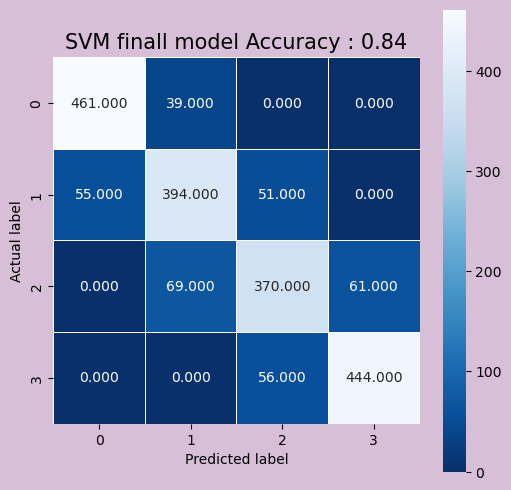

In [76]:
cm1 = confusion_matrix (y , SVM.predict (x_norm))
score1 = SVM.score(x_test, y_test)


fig = plt.figure(figsize = (13, 6), facecolor='thistle')

plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SVM finall model Accuracy : {0}'.format(score1)
plt.title(all_sample_title, size = 15)

    
And here is the result of SVM algorithm 
    
its prediction wasn't bad, i got better score and prediction in two other algorithms though.

# Comparing models

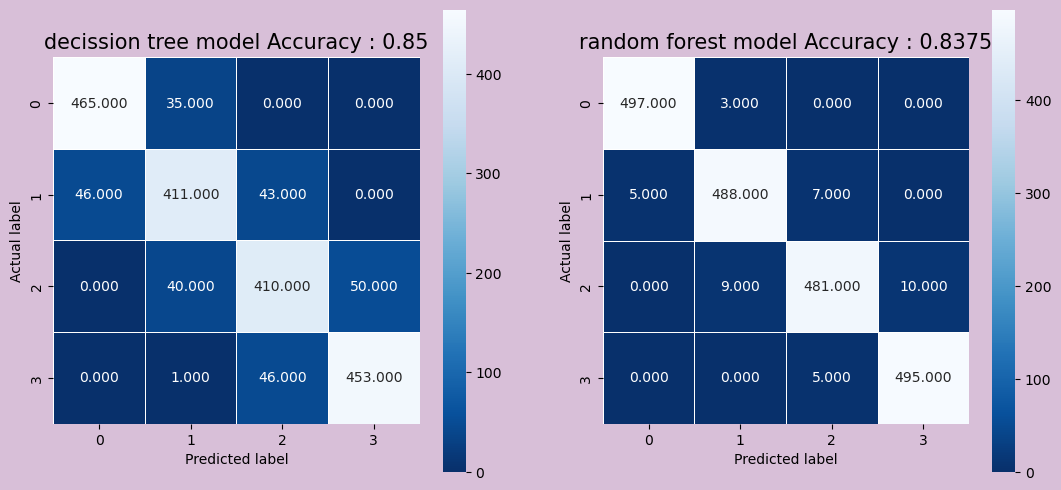

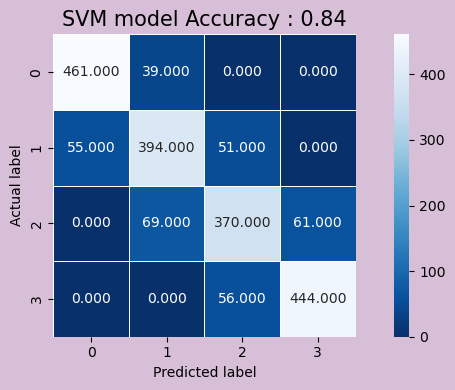

In [77]:
# decission tree
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .11 , random_state = 0)
DTs = DecisionTreeClassifier ( criterion = 'gini',max_depth = 8, min_samples_leaf = 9,
                               random_state = 0 , min_samples_split = 20)
DTs.fit (x_train , y_train.ravel())
cm1 = confusion_matrix (y , DTs.predict (x_norm))
score1 = DTs.score(x_test, y_test)

# random forest
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .12 , random_state = 0)
RF = RandomForestClassifier (random_state = 0 , n_estimators = 115 , max_depth = 21) 
RF.fit (x_train , y_train.ravel())
y_pred = RF.predict (x_test)
cm2 = confusion_matrix (y , RF.predict (x_norm))
score2 = RF.score(x_test, y_test)

# SVM
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .15 , random_state = 0)
SVM = SVC ( kernel = 'linear') 
SVM.fit (x_train , y_train.ravel())
y_pred = SVM.predict (x_test)
cm3 = confusion_matrix (y , SVM.predict (x_norm))
score3 = SVM.score(x_test, y_test)


fig = plt.figure(figsize = (13, 6), facecolor='thistle')

#DT
plt.subplot(1, 2, 1)
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'decission tree model Accuracy : {0}'.format(score1)
plt.title(all_sample_title, size = 15)

#RF
plt.subplot(1, 2, 2)
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'random forest model Accuracy : {0}'.format(score2)
plt.title(all_sample_title, size = 15)



fig = plt.figure(figsize = (8, 4), facecolor='thistle')

#SVM
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'SVM model Accuracy : {0}'.format(score3)
plt.title(all_sample_title, size = 15)

plt.tight_layout()
plt.show()

    
For this dataset the best algorithm which predicts better is random forest with a nice score and and very low number of errors

# predicting the test dataset

In [78]:
# import the dataset
data = pd.read_csv ("test.csv")
df_test = pd.DataFrame (data)
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


    
lets have a general view for knowing the range and many other informations about our new samples for prediction

In [79]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [80]:
Xs = df_test.copy()

In [81]:
Xs.drop (['px_height' , 'px_width' , 'sc_h' , 'sc_w' ,'id'] , axis = 1 , inplace = True)
Xs

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,3476,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,3895,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,2396,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,3893,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,1773,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,2121,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1933,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,1223,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,2509,6,0,1,0


    
Removing the columns that i dont let them to be trained with my algorithms

and id column that doesn't exist in our train data set and model

In [82]:
# scaling our new samples becsuse we scaled our samples in trained models
Scaler = StandardScaler ()
test = Scaler.fit_transform (Xs)


# random forest (our best model)
x_train , x_test , y_train , y_test = train_test_split (x_norm , y , test_size = .12 , random_state = 0)
RF = RandomForestClassifier (random_state = 0 , n_estimators = 115 , max_depth = 21) 
RF.fit (x_train , y_train.ravel())
y_test = RF.predict (test)

y_test  #  (predicted targets)

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 0, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 2, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 1, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 1, 1, 1, 0, 3, 3, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 0, 3, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 2, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 1, 0, 3, 3, 1,

In [83]:
# transform them to dataframe
df_y = pd.DataFrame (y_test)
df_y = df_y.rename(columns={0: 'price_range'})
df_y

,price_range
0,3
1,3
2,2
3,3
4,1
...,...
995,2
996,1
997,1
998,2


In [84]:
# add them to main test dataframe
df_test['price_range'] = df_y['price_range']

test dataset with predicted targets

In [85]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,1
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2


In [86]:
df_test.describe ().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


some simple visualization for my predictions

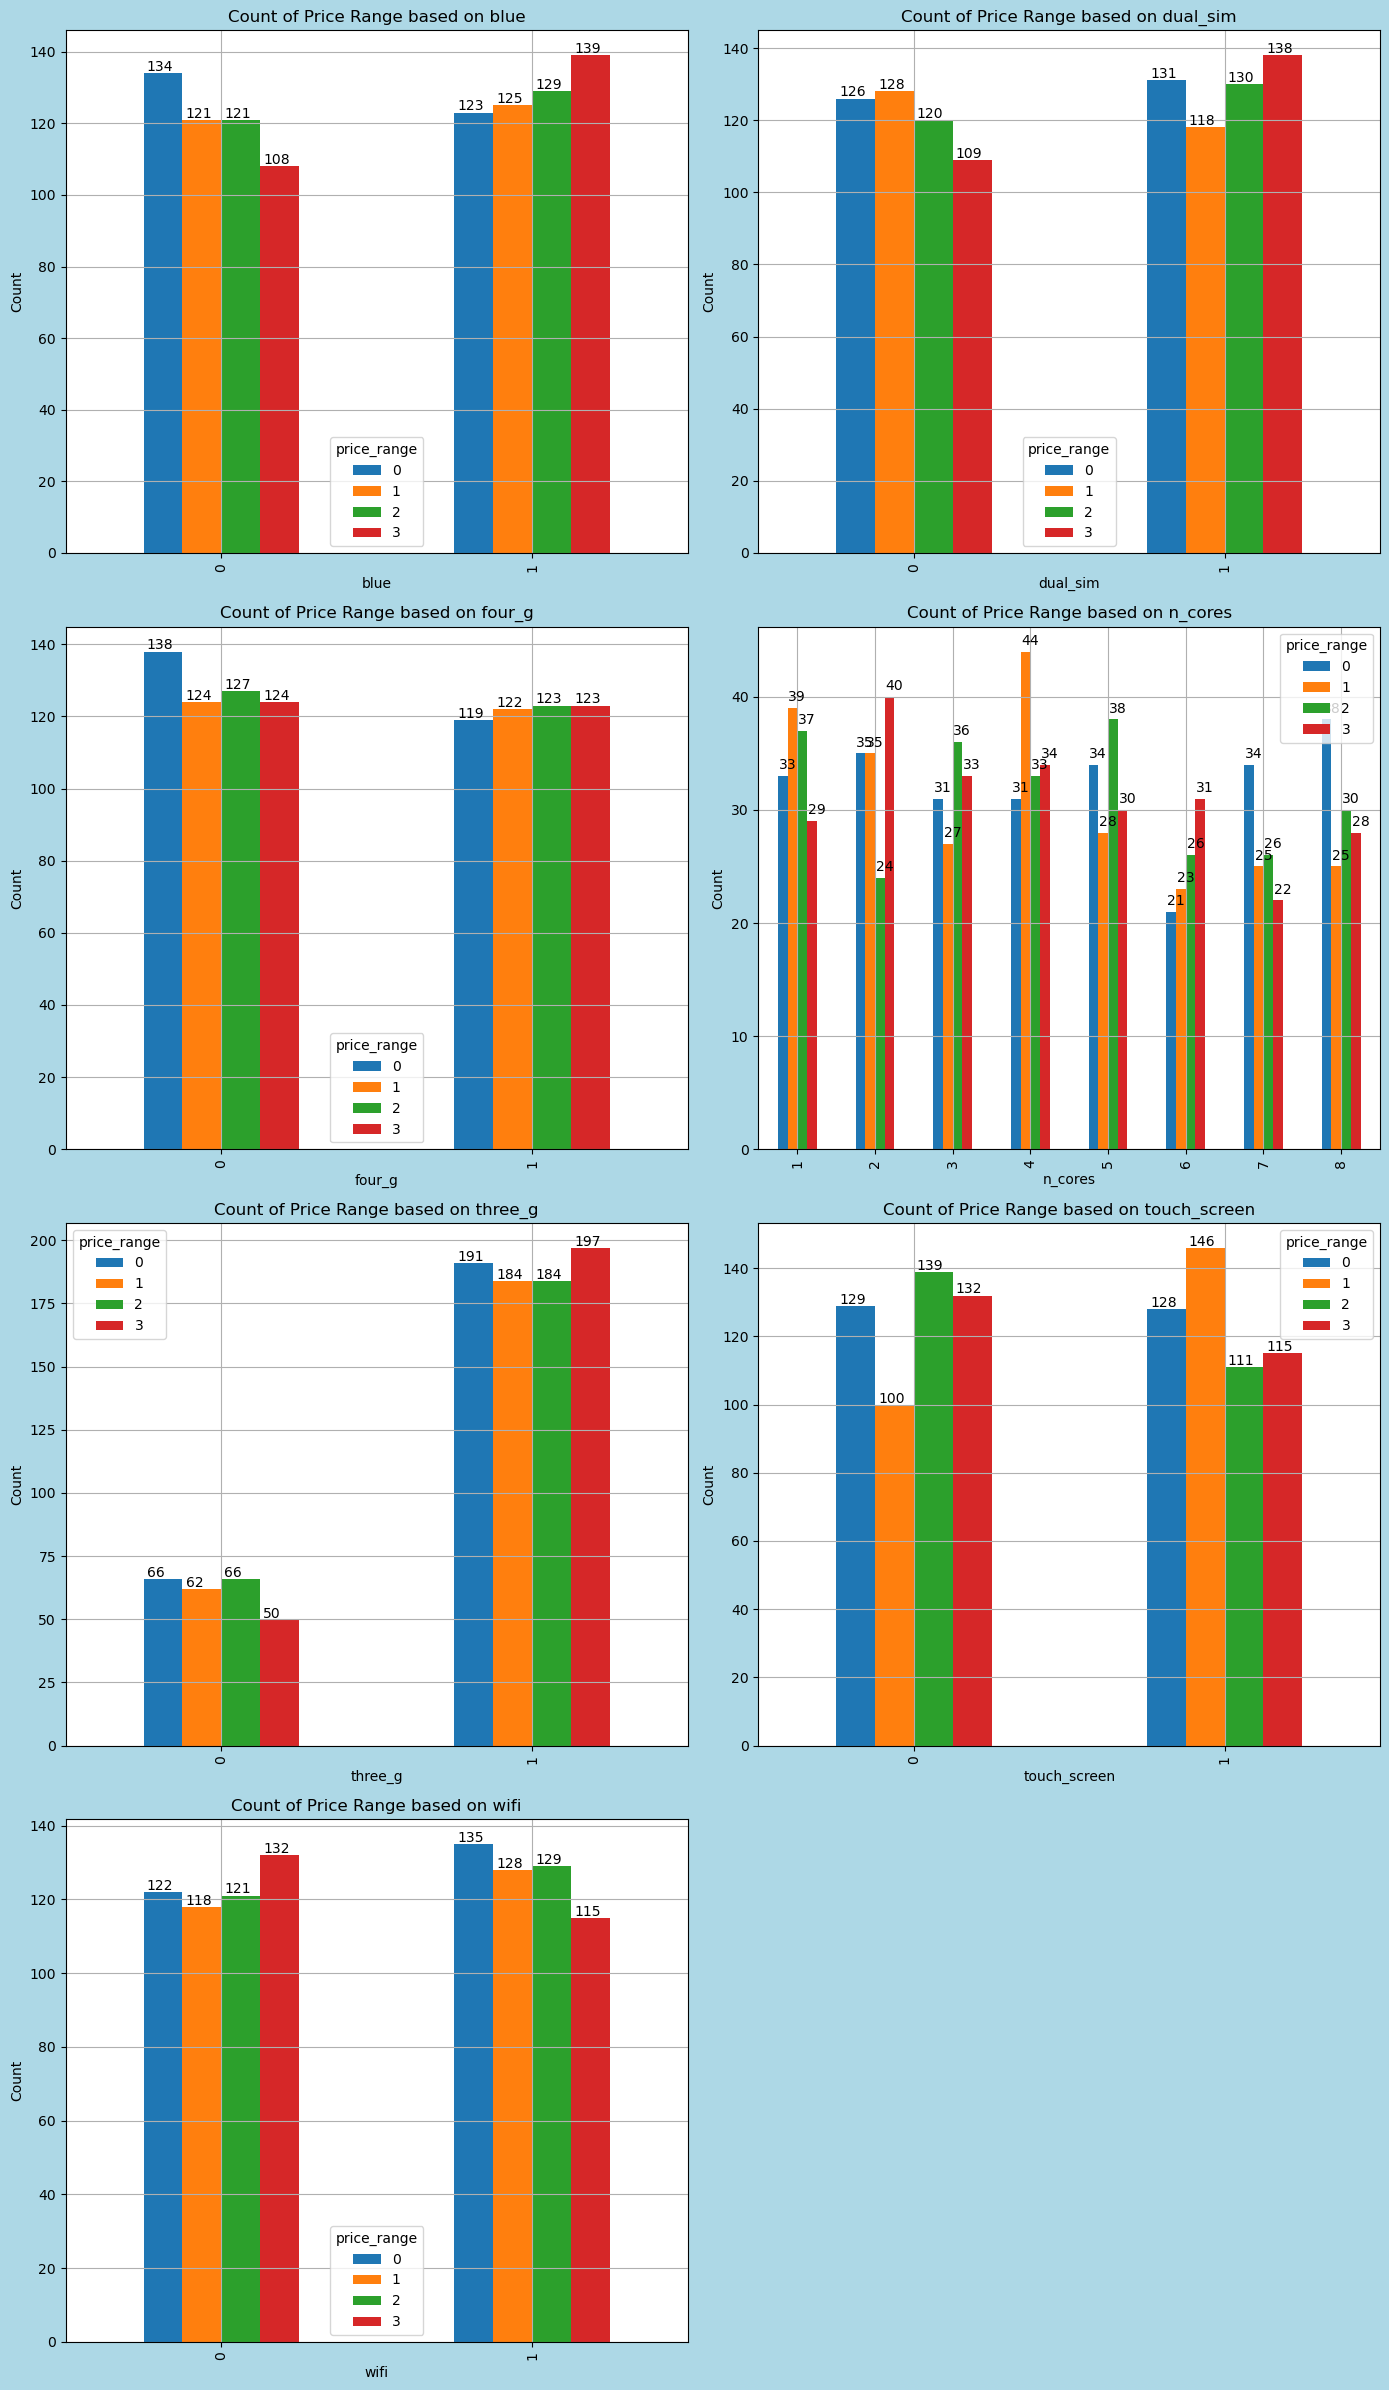

In [87]:
columns = ['blue', 'dual_sim','four_g','n_cores', 'three_g','touch_screen', 'wifi']
no_of_columns = len(columns)

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(14, 24) , facecolor='lightblue')
ax = ax.flatten()

for i, column in enumerate(columns):
    grouped_data = df_test.groupby([column, 'price_range']).size().reset_index(name='count')
    grouped_plot = grouped_data.pivot(column, 'price_range', 'count').plot(kind='bar', ax=ax[i])
        
    ax[i].set_title(f'Count of Price Range based on {column}')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Count')
    ax[i].grid()
        
    for p in ax[i].patches:
        ax[i].annotate(str(p.get_height()), (p.get_x() + 0.01, p.get_height() + 0.6)) 
        

if no_of_columns % 2 != 0:
    fig.delaxes(ax[-1])

plt.tight_layout()
plt.show()

    
Here are some bar plots which show the new labels (price classification) that test dataframe gained from my model.

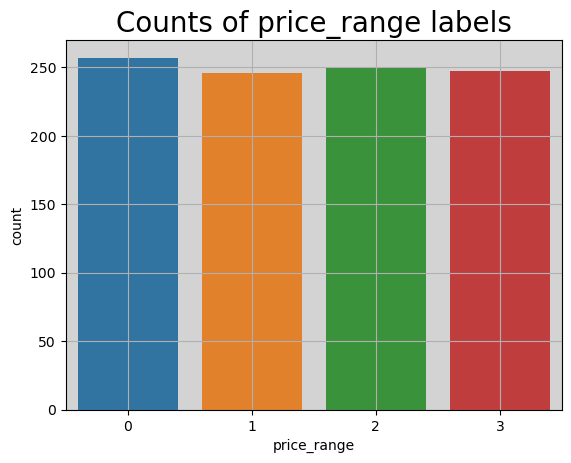

In [88]:
sns.countplot(x='price_range', data=df_test)
plt.title('Counts of price_range labels', fontsize=20)  
plt.grid ()
plt.gca().set_facecolor('lightgray')

    
At last you can see count of predicted samples and their labels.

# Hope you enjoyed this notebook. Thanks for your time and attention.